In [ ]:
# for colab to work with drive... change this as needed or comment out
!ln -s "drive/My Drive/Colab Notebooks/UVM Principles of Complex Systems/project"/*/ .

ln: failed to create symbolic link './data': File exists
ln: failed to create symbolic link './out': File exists
ln: failed to create symbolic link './tmp': File exists


In [ ]:
%env DATADIR=data
%env OUTDIR=out

env: DATADIR=data
env: OUTDIR=out


In [ ]:
!bzip2 -kcd "$DATADIR/Calls.csv.bz2" > tmp/Calls.csv
!bzip2 -kcd "$DATADIR/Proximity.csv.bz2" > tmp/Proximity.csv
!bzip2 -kcd "$DATADIR/SMS.csv.bz2" > tmp/SMS.csv
!bzip2 -kcd "$DATADIR/WLAN2.csv.bz2" > tmp/WLAN2.csv

In [ ]:
!pip install SciencePlots

  Created wheel for SciencePlots: filename=SciencePlots-1.0.6-cp36-none-any.whl size=4140 sha256=f2bb175c38f005ed7f652173c0370346756d3b268efb5b0242572ad9b84ca274
  Stored in directory: /root/.cache/pip/wheels/66/f8/97/c4d1f89a613feb90268bf62b192c3038e87e453d6d36b7726c
Successfully built SciencePlots


In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science', 'no-latex'])
import networkx as nx
import scipy.stats as ss

In [ ]:
datadir = os.getenv("DATADIR")
outdir = os.getenv("OUTDIR")
datadir, outdir

('data', 'out')

# Data

In [ ]:
calls = pd.read_csv("tmp/Calls.csv")
calls

,user_id,time_stamp,duration,dest_user_id_if_known,dest_phone_hash
0,19.0,2008-10-02 22:04:28,15,NaN,2088297235
1,19.0,2008-10-02 22:03:57,17,NaN,2088297235
2,19.0,2008-10-03 00:42:55,421,NaN,2939471263
3,19.0,2008-10-03 00:42:06,0,NaN,2088297235
4,19.0,2008-10-03 03:47:31,47,18.0,3620995333
...,...,...,...,...,...
63819,1.0,2008-11-02 21:12:49,0,NaN,1735071629
63820,1.0,2008-11-04 20:50:42,44,NaN,2867604986
63821,1.0,2008-11-04 21:08:52,173,61.0,3480933661
63822,1.0,2008-11-06 03:37:19,26,61.0,3480933661


In [ ]:
proximity = pd.read_csv("tmp/Proximity.csv")
proximity

,user.id,remote.user.id.if.known,time,prob2
0,58,42,2007-09-05 14:02:11,0.034
1,58,49,2007-09-05 14:02:11,0.000
2,58,54,2007-09-05 14:02:11,NaN
3,58,57,2007-09-05 14:02:11,0.233
4,58,74,2007-09-05 14:02:11,NaN
...,...,...,...,...
2124559,64,43,2009-07-16 15:56:25,NaN
2124560,64,43,2009-07-16 16:01:57,NaN
2124561,64,62,2009-07-16 18:30:11,0.000
2124562,64,62,2009-07-16 18:35:26,0.000


In [ ]:
sms = pd.read_csv("tmp/SMS.csv", encoding="iso-8859-1")
sms

,user.id,time,incoming,dest.user.id.if.known,dest.phone.hash
0,61,2008-01-01 15:00:25,0,1.0,3502965008
1,61,2008-01-01 15:00:25,0,61.0,3480933661
2,61,2008-01-01 15:00:25,1,1.0,3502965008
3,61,2008-01-01 15:00:25,1,NaN,177622
4,61,2008-01-01 15:00:25,1,61.0,3480933661
...,...,...,...,...,...
76532,7,2009-06-26 21:16:06,0,4.0,3708966819
76533,7,2009-06-26 21:17:34,1,4.0,3708966819
76534,7,2009-06-27 22:45:38,1,4.0,3708966819
76535,7,2009-06-27 23:26:58,0,4.0,3708966819


In [ ]:
wlan = pd.read_csv("tmp/WLAN2.csv")
wlan

,user_id,time,wireless_mac,strength,unix_time
0,14,2008-10-01 18:45:30,1278,-89,1222901130
1,14,2008-10-01 18:45:30,5476,-96,1222901130
2,14,2008-10-01 18:45:30,8549,-92,1222901130
3,14,2008-10-01 18:45:30,16319,-95,1222901130
4,14,2008-10-01 18:45:30,17373,-96,1222901130
...,...,...,...,...,...
1998041,22,2009-05-31 20:57:58,703,-60,1243817878
1998042,22,2009-05-31 20:57:58,707,-69,1243817878
1998043,22,2009-05-31 20:57:58,822,-75,1243817878
1998044,22,2009-05-31 20:57:58,5830,-53,1243817878


In [ ]:
mgp = pd.read_csv("data/MusicGenrePreference.csv")
mgp

,user.id,genre,date,score
0,73,indie / alternative rock,2008-09-22,NaN
1,55,indie / alternative rock,2008-09-19,NaN
2,36,indie / alternative rock,2008-09-19,2 Moderate Interest
3,39,indie / alternative rock,2008-09-18,NaN
4,37,indie / alternative rock,2008-09-16,3 High Interest
...,...,...,...,...
2910,48,other,2009-06-01,2 Moderate Interest
2911,72,other,2009-06-01,2 Moderate Interest
2912,79,other,2009-06-01,2 Moderate Interest
2913,34,other,2009-06-01,NaN


In [ ]:
activities = pd.read_csv("data/Activities.csv")
activities

,user.id,campus.organization,survey.month
0,9,44,2008.09
1,44,44,2008.09
2,66,44,2008.09
3,6,44,2008.09
4,30,44,2008.09
...,...,...,...
690,71,44,2009.06
691,71,7,2009.06
692,71,46,2009.06
693,71,24,2009.06


In [ ]:
health = pd.read_csv("data/Health.csv")
health

,user_id,current_weight,current_height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month
0,55,140.0,69.0,0.0,0.0,Below average,2.0,0.0,Never,2008.09
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09
...,...,...,...,...,...,...,...,...,...,...
380,48,220.0,77.0,1.0,2.0,Healthy,3.0,3.0,Never,2009.06
381,24,110.0,63.0,1.0,2.0,Healthy,1.0,0.0,Never,2009.06
382,66,160.0,70.0,0.0,2.0,Average,2.0,1.0,Never,2009.06
383,65,140.0,66.0,4.0,2.0,Healthy,2.0,0.0,Never,2009.06


In [ ]:
wlan["time"] = pd.to_datetime(wlan['time'])
proximity["time"] = pd.to_datetime(proximity['time'])

## Time resolution

Align the WLAN and proximity data within a specified interval

In [ ]:
time_res = "20s"

In [ ]:
wlan["r_time"] = wlan["time"].round(time_res)
proximity["r_time"] = proximity["time"].round(time_res)
wlan, proximity

(         user_id                time  ...   unix_time              r_time
 0             14 2008-10-01 18:45:30  ...  1222901130 2008-10-01 18:45:20
 1             14 2008-10-01 18:45:30  ...  1222901130 2008-10-01 18:45:20
 2             14 2008-10-01 18:45:30  ...  1222901130 2008-10-01 18:45:20
 3             14 2008-10-01 18:45:30  ...  1222901130 2008-10-01 18:45:20
 4             14 2008-10-01 18:45:30  ...  1222901130 2008-10-01 18:45:20
 ...          ...                 ...  ...         ...                 ...
 1998041       22 2009-05-31 20:57:58  ...  1243817878 2009-05-31 20:58:00
 1998042       22 2009-05-31 20:57:58  ...  1243817878 2009-05-31 20:58:00
 1998043       22 2009-05-31 20:57:58  ...  1243817878 2009-05-31 20:58:00
 1998044       22 2009-05-31 20:57:58  ...  1243817878 2009-05-31 20:58:00
 1998045       22 2009-05-31 20:57:58  ...  1243817878 2009-05-31 20:58:00
 
 [1998046 rows x 6 columns],
          user.id  remote.user.id.if.known  ...  prob2              r

## Exploration

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mgp.groupby(['date', 'genre']).size())

date        genre                       
2008-09-15  classic rock                    48
            classical                       48
            country / folk                  48
            heavy metal / hardcore          48
            hip-hop / r&b                   48
            indie / alternative rock        48
            jazz                            48
            other                           48
            pop / top 40                    48
            showtunes                       48
            techno / lounge / electronic    48
2008-09-16  classic rock                    22
            classical                       22
            country / folk                  22
            heavy metal / hardcore          22
            hip-hop / r&b                   22
            indie / alternative rock        22
            jazz                            22
            other                           22
            pop / top 40                    22
            showtun

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(activities.groupby(['survey.month', 'campus.organization']).size())

survey.month  campus.organization
2008.09       4                       2
              6                      12
              16                      6
              24                     16
              25                     22
              26                     10
              31                     22
              33                      6
              34                      4
              36                     14
              38                      6
              39                     10
              40                      2
              44                     14
              45                      6
              46                     10
              49                     58
              51                     14
              53                      4
              57                      2
              60                      6
              64                      2
2009.03       1                       2
              5                       2
      

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(health.groupby(['healthy_diet']).size())

healthy_diet
Average           148
Below average      88
Healthy            82
Unhealthy          50
Very healthy        8
Very unhealthy      6
dtype: int64


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(health.groupby(['survey.month', 'aerobic_per_week']).size())

survey.month  aerobic_per_week
2008.09       0.0                 12
              1.0                 17
              2.0                 14
              3.0                 10
              4.0                  4
              5.0                  7
              6.0                  3
              7.0                  1
2008.10       0.0                 15
              1.0                 17
              2.0                  7
              3.0                 10
              4.0                  6
              5.0                  5
              6.0                  2
              7.0                  2
2008.12       0.0                 24
              1.0                  9
              2.0                 14
              3.0                  8
              4.0                  3
              5.0                  4
              6.0                  3
              7.0                  1
2009.03       0.0                 15
              1.0                 16
       

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(health.groupby(['survey.month', 'sports_per_week']).size())

survey.month  sports_per_week
2008.09       0.0                36
              1.0                14
              2.0                10
              3.0                 2
              5.0                 5
              6.0                 1
2008.10       0.0                33
              1.0                14
              2.0                 9
              3.0                 2
              4.0                 1
              5.0                 3
              6.0                 2
2008.12       0.0                38
              1.0                11
              2.0                10
              3.0                 1
              4.0                 2
              5.0                 2
              6.0                 2
2009.03       0.0                37
              1.0                 9
              2.0                 6
              3.0                 3
              4.0                 4
              6.0                 2
2009.04       0.0                4

In [ ]:
# individual interaction counts for a given time interval (adjust freq)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for k, g in proximity.groupby(pd.Grouper(key='r_time', freq='M', label='right')):
        print(k)
        print(g.groupby(['user.id', 'remote.user.id.if.known']).size())

Streaming output truncated to the last 5000 lines.
         61                          617
         62                           34
         63                           39
         64                            9
         67                            2
         68                            2
         69                            6
         70                           44
         71                          514
         72                            6
         75                            2
         76                          815
         77                           53
         79                           10
         80                            3
4        1                           168
         2                             9
         5                             4
         6                             2
         7                          1701
         8                            19
         9                           393
         11                         2495
      

In [ ]:
def get_interact_counts(data, id=None, freq='W', offset=None, start=None, end=None):
    # data is a dataframe with the variables seen below
    # id is the user id
    # freq is the time offset (minutely, daily, weekly, etc.) https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
    # start, end is the start and end of the interval
    df = data

    out = {}
    if start:
        df = df[df['r_time'] > start]
    if end:
        df = df[df['r_time'] < end]

    for k, g in df.groupby(pd.Grouper(key='r_time', freq=freq, offset=offset, origin='start', label='right')):
        if id:
            g = g[g['user.id'] == id]
        g_size = g.groupby(['user.id', 'remote.user.id.if.known']).size()
        out[k] = g_size
    return out

get_interact_counts(proximity, id=55, freq='D', start='2009-03-08', end='2009-04-05')

{Timestamp('2009-03-09 00:00:20', freq='D'): user.id  remote.user.id.if.known
 55       2                            2
          5                           18
          14                          17
          16                           2
          20                          31
          21                          11
          22                           1
          23                         101
          33                           4
          34                          62
          36                           1
          42                          83
          43                          20
          44                          63
          46                          13
          57                           3
          59                          45
          63                          20
          64                          11
          71                          28
          76                          36
          77                          84
          79        

**TODO**: Study the scaling and dynamics of the interaction counts.


## Merge

Merge the WLAN and proximity data on user ID and the rounded time.

In [ ]:
# removes any where remote user id is NA; most important is the proximity data
wlan_prox = pd.merge(wlan, proximity, how='right', left_on=['user_id', 'r_time'], right_on=['user.id', 'r_time'], suffixes=["_wlan", "_prox"]).dropna(subset=["remote.user.id.if.known"])
wlan_prox['remote.user.id.if.known'] = np.int64(wlan_prox['remote.user.id.if.known'])
wlan_prox['user.id'] = np.int64(wlan_prox['user.id'])
wlan_prox = wlan_prox[wlan_prox['user.id'] != wlan_prox['remote.user.id.if.known']]
wlan_prox

,user_id,time_wlan,wireless_mac,strength,unix_time,r_time,user.id,remote.user.id.if.known,time_prox,prob2
0,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,42,2007-09-05 14:02:11,0.034
1,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,49,2007-09-05 14:02:11,0.000
2,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,54,2007-09-05 14:02:11,NaN
3,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,57,2007-09-05 14:02:11,0.233
4,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,74,2007-09-05 14:02:11,NaN
...,...,...,...,...,...,...,...,...,...,...
2233455,NaN,NaT,NaN,NaN,NaN,2009-07-16 15:56:20,64,43,2009-07-16 15:56:25,NaN
2233456,NaN,NaT,NaN,NaN,NaN,2009-07-16 16:02:00,64,43,2009-07-16 16:01:57,NaN
2233457,NaN,NaT,NaN,NaN,NaN,2009-07-16 18:30:20,64,62,2009-07-16 18:30:11,0.000
2233458,NaN,NaT,NaN,NaN,NaN,2009-07-16 18:35:20,64,62,2009-07-16 18:35:26,0.000


In [ ]:
df_interact_size = wlan_prox[['user_id', 'remote.user.id.if.known']].groupby(['user_id', 'remote.user.id.if.known']).size().to_frame("size").reset_index()
df_interact_size['user_id'] = df_interact_size['user_id'].astype(int)
df_interact_size

,user_id,remote.user.id.if.known,size
0,1,2,162
1,1,4,26
2,1,11,100
3,1,14,494
4,1,20,14
...,...,...,...
1074,79,64,6
1075,79,66,6
1076,79,68,168
1077,79,71,11


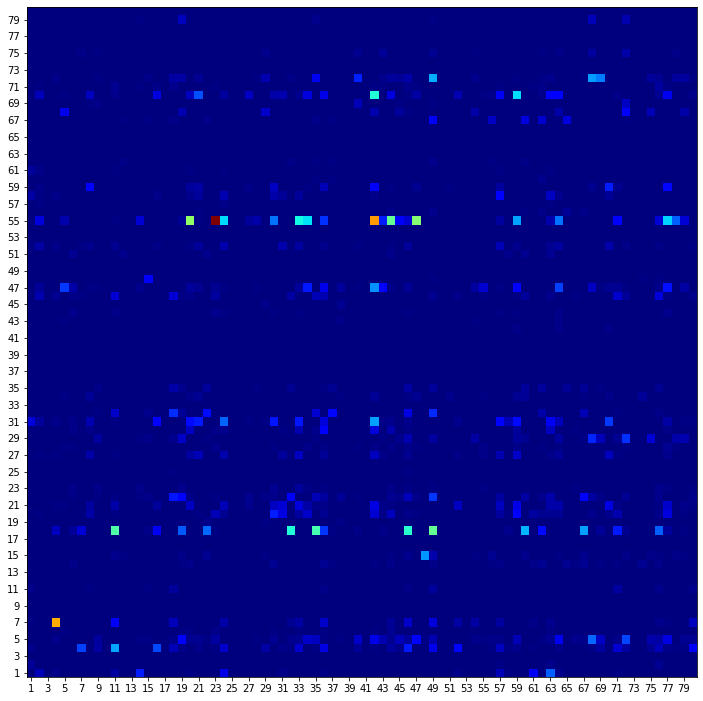

In [ ]:
max_id = max(df_interact_size['user_id'].max(), df_interact_size['remote.user.id.if.known'].max())
freq_mat = np.zeros((max_id, max_id))
for index, row in df_interact_size.iterrows():
    user_id, remote_id, size = row
    freq_mat[user_id-1, remote_id-1] += size

fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(freq_mat, cmap='jet')
ax.invert_yaxis()
ax.set_xticks(np.arange(0, max_id, 2), minor=False)
ax.set_yticks(np.arange(0, max_id, 2), minor=False)
ax.set_xticklabels(np.arange(1, max_id, 2), minor=False)
ax.set_yticklabels(np.arange(1, max_id, 2), minor=False)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
fig.savefig(os.path.join(outdir, 'interact_freq.png'), bbox_inches='tight')

# Graph

## Individual Interaction Graphs - "Oh yeah. It's all coming together."

In [ ]:
def construct_graphs(*args, **kwargs):
    outs = {}
    counts = get_interact_counts(*args, **kwargs)
    for t, df in counts.items():
        df = df.to_frame("size").reset_index()
        interact_graph = nx.from_pandas_edgelist(df, source='user.id', target='remote.user.id.if.known', edge_attr='size')
        outs[t] = interact_graph
    return outs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


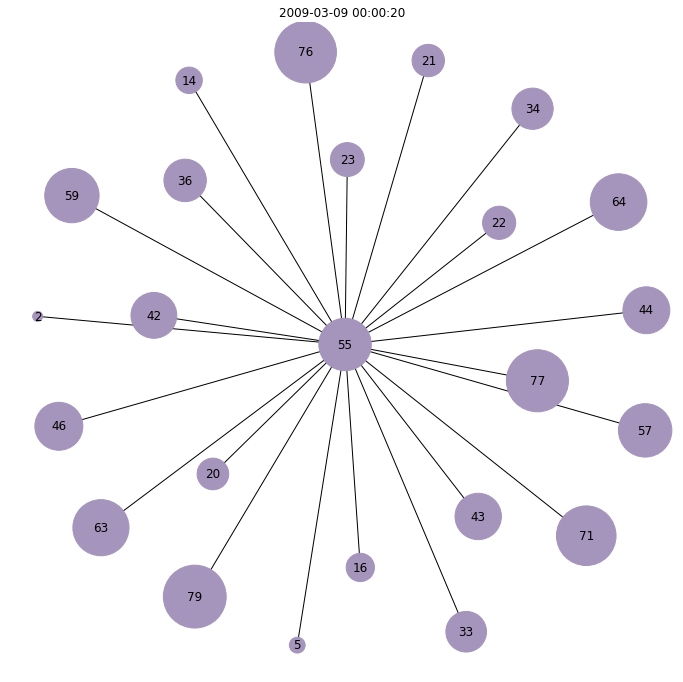

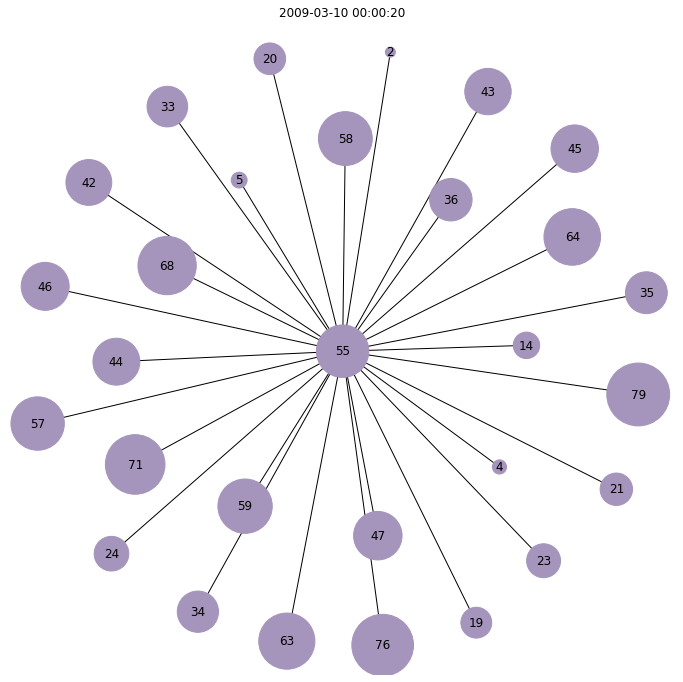

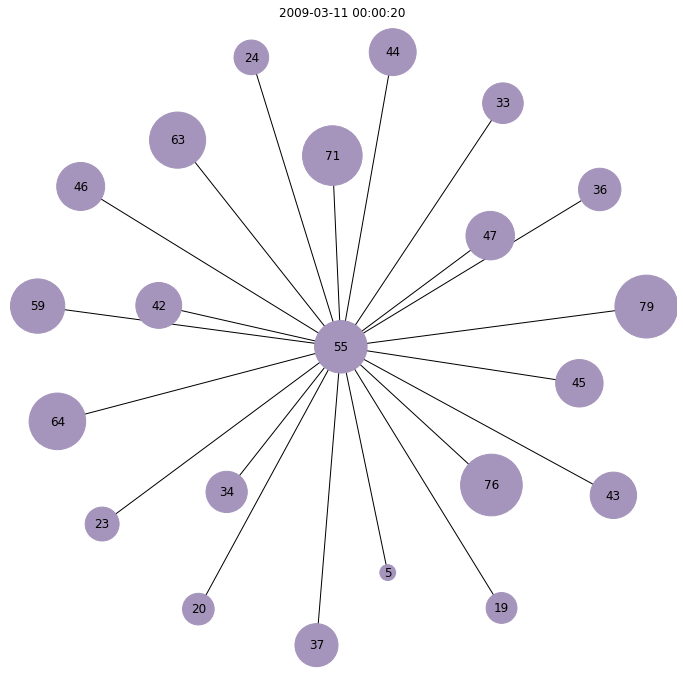

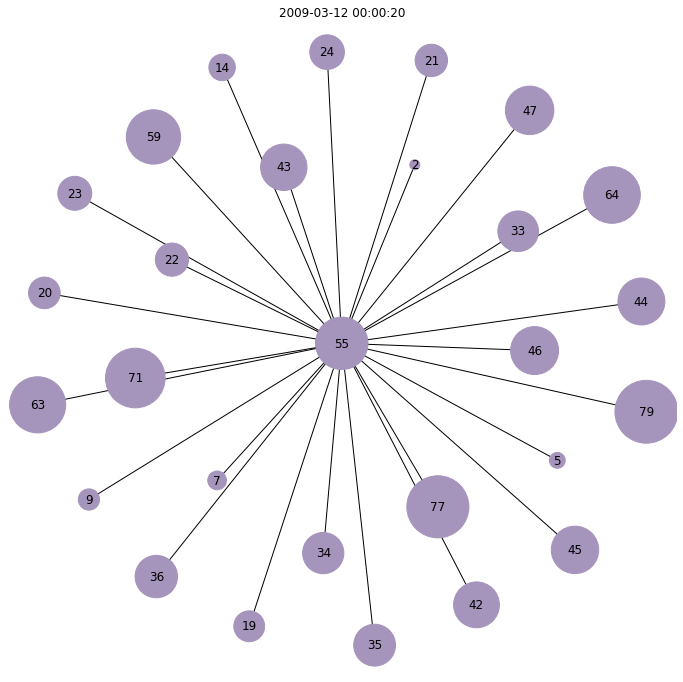

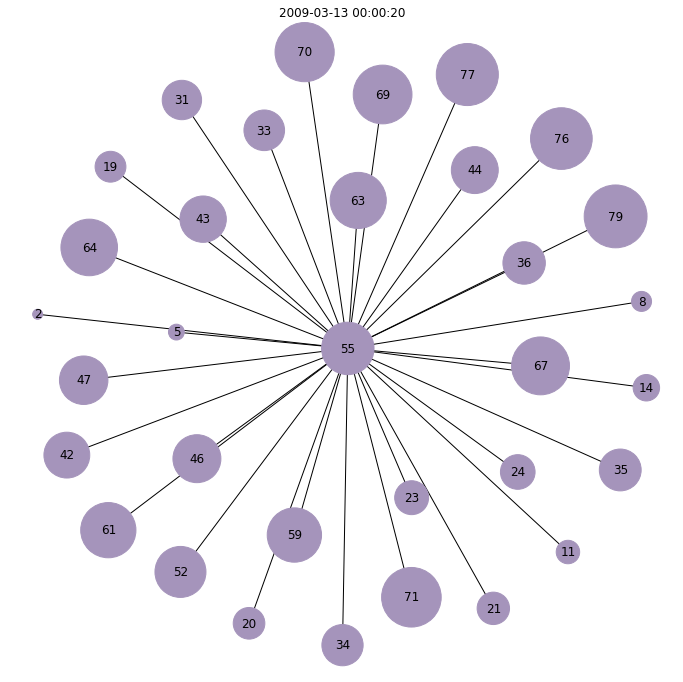

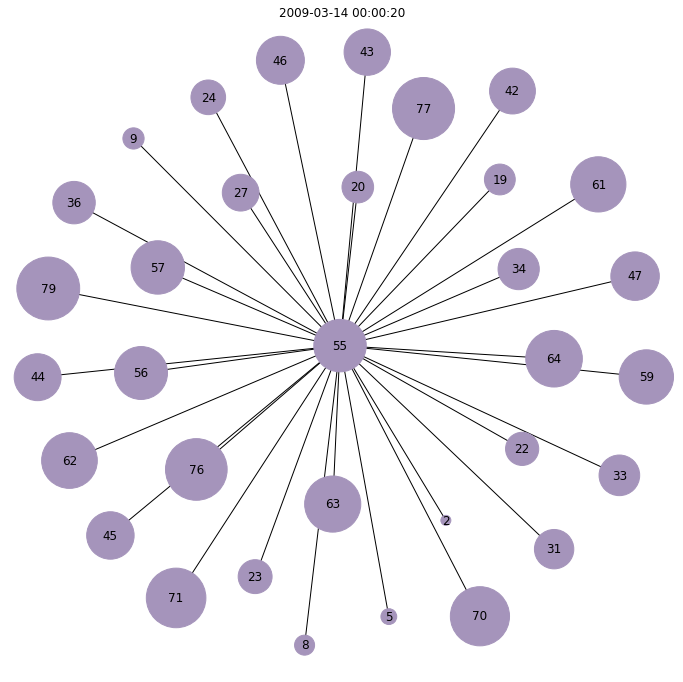

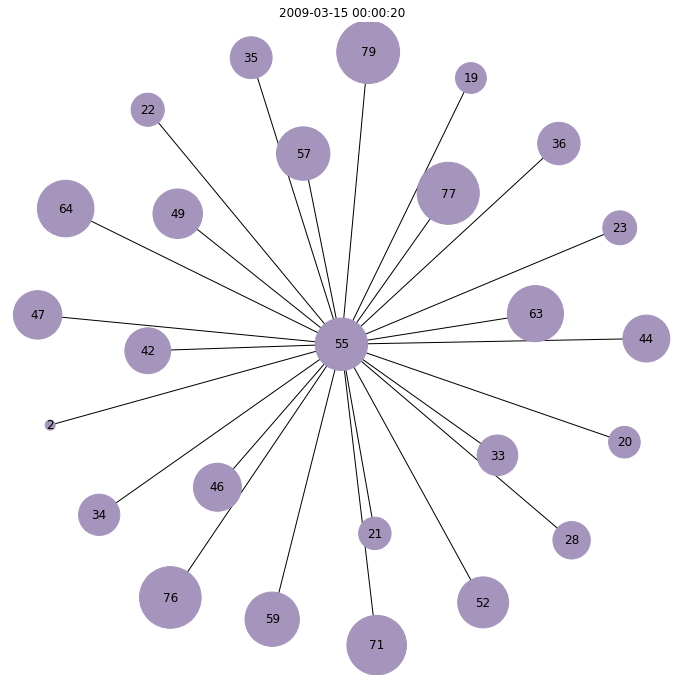

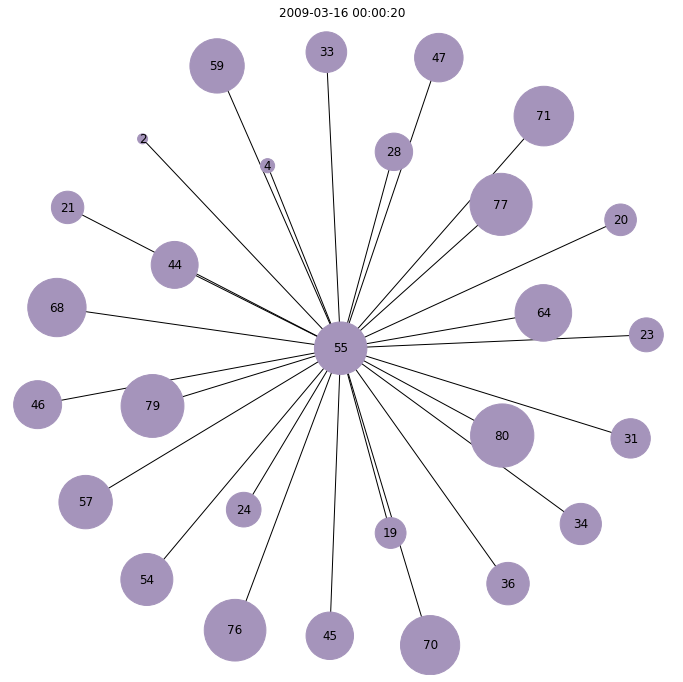

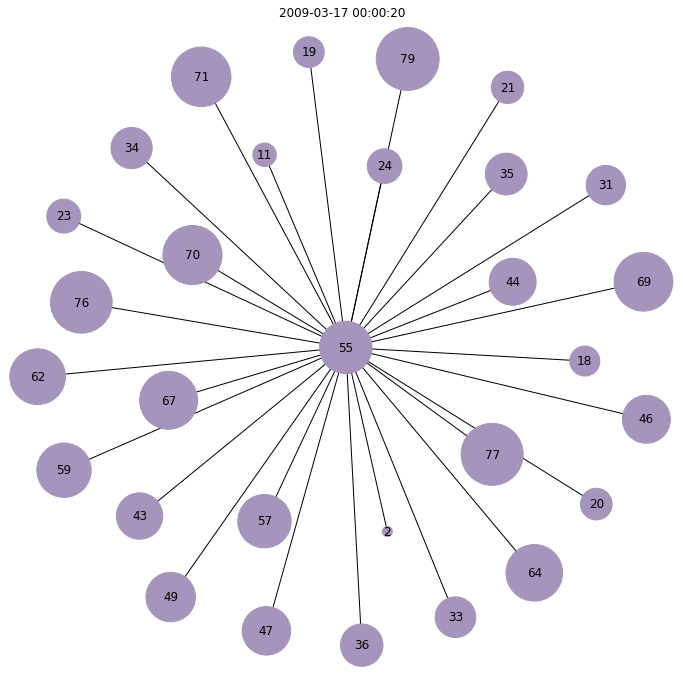

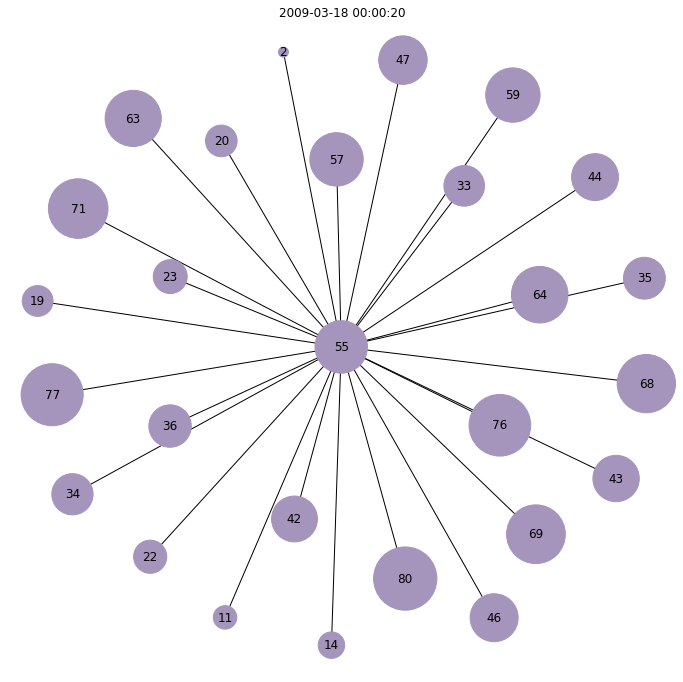

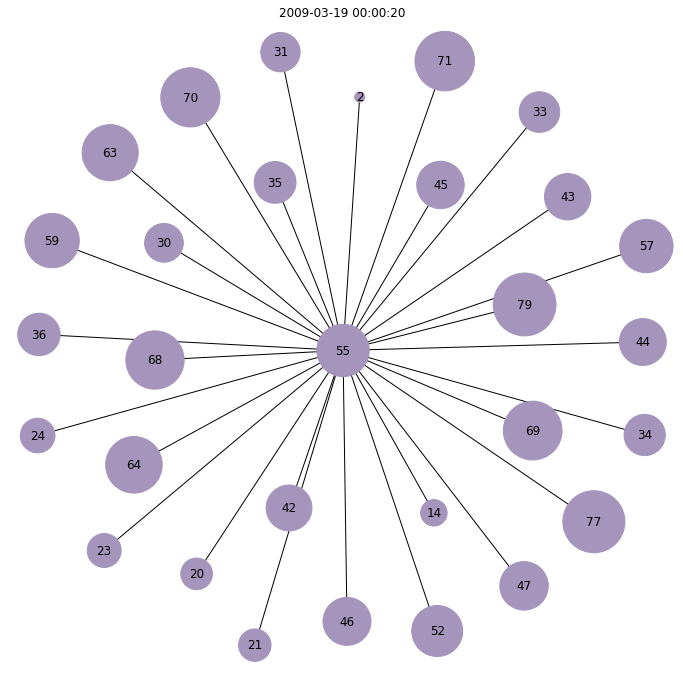

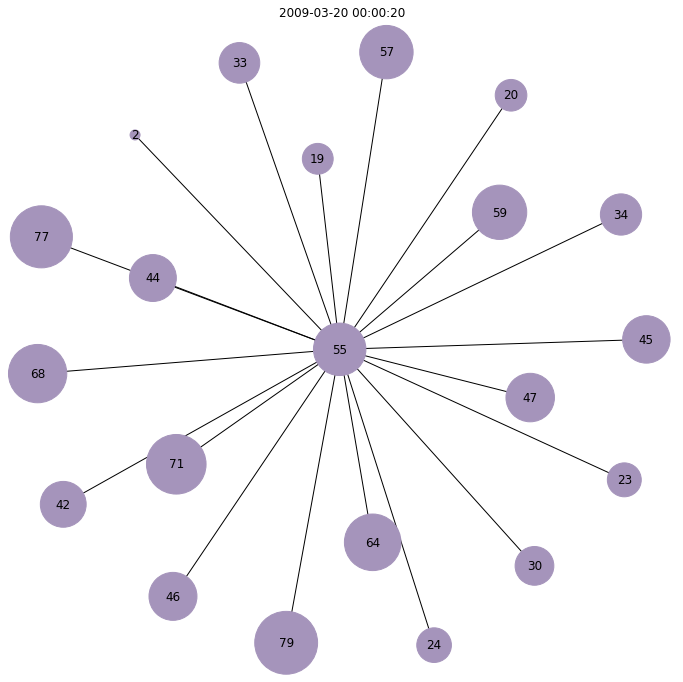

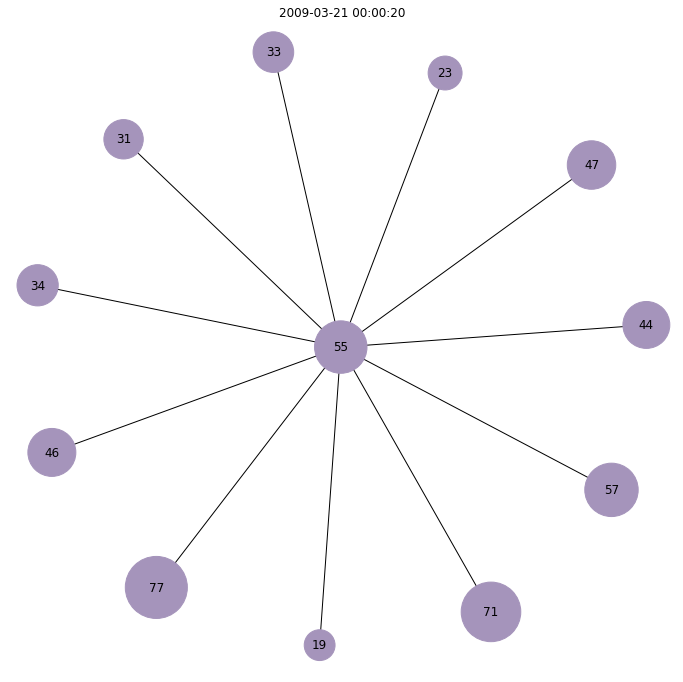

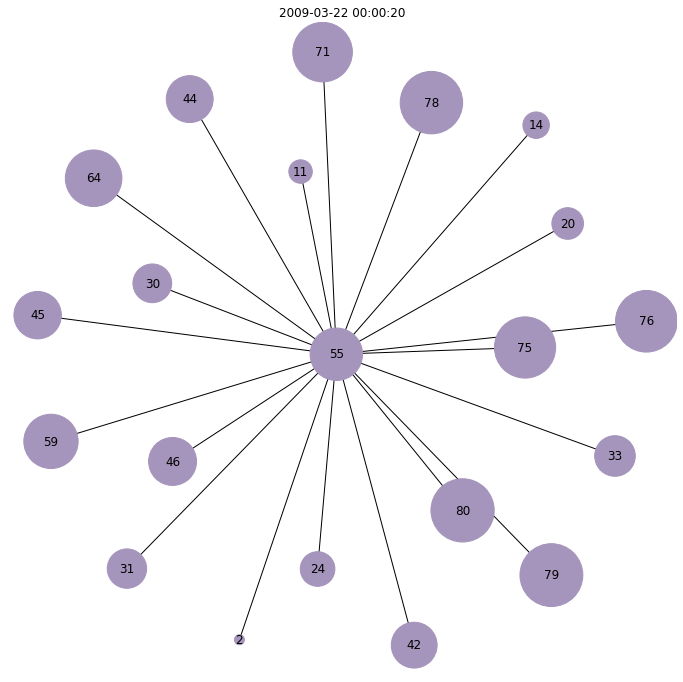

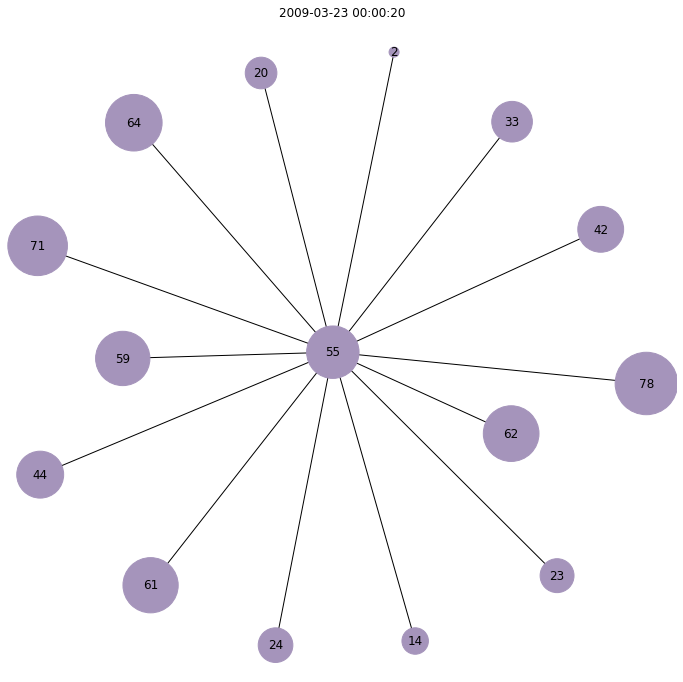

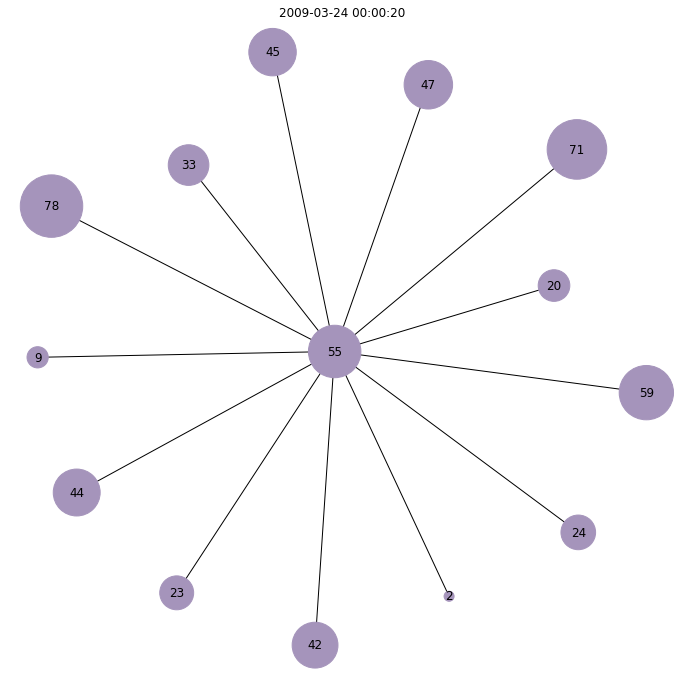

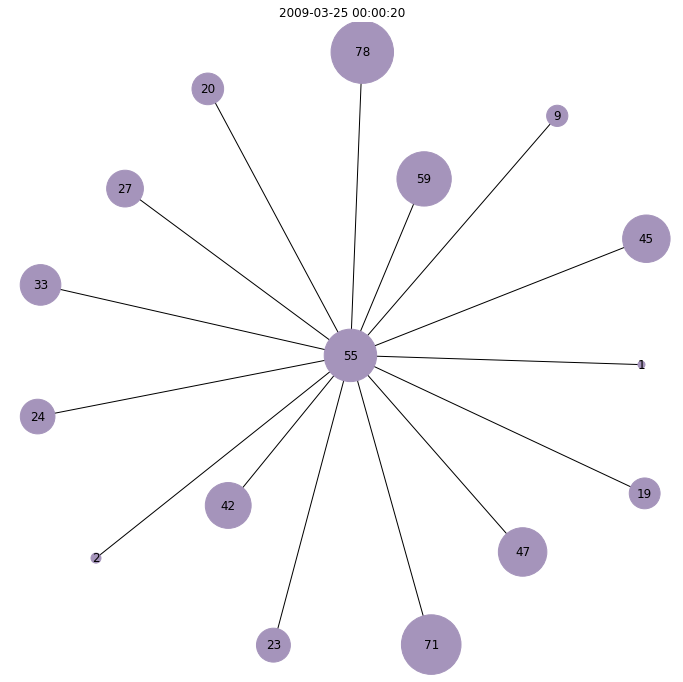

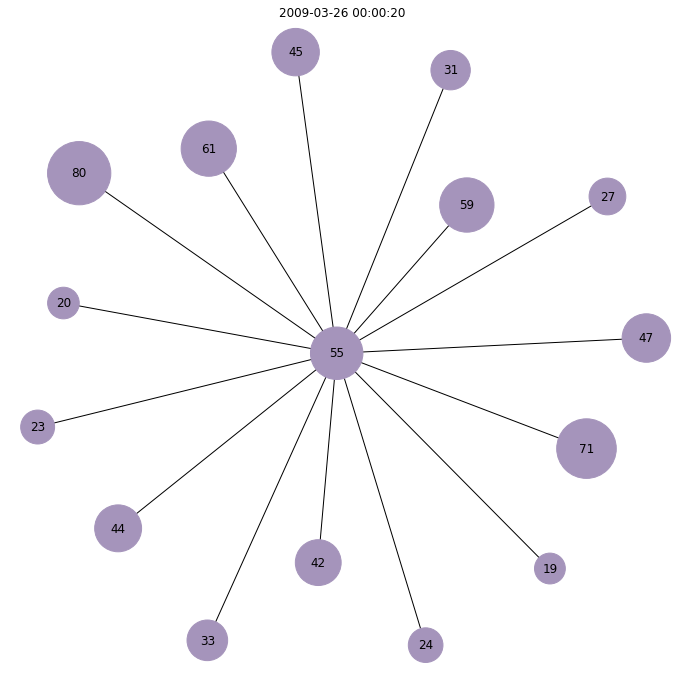

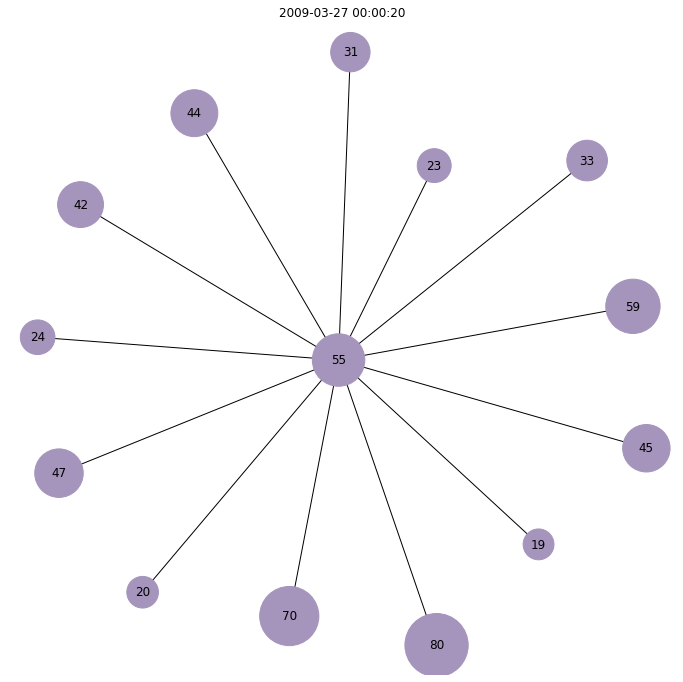

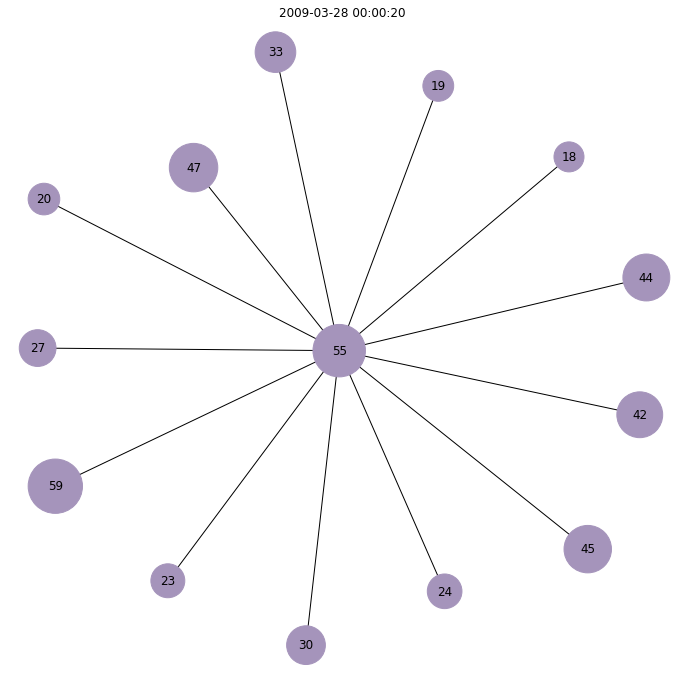

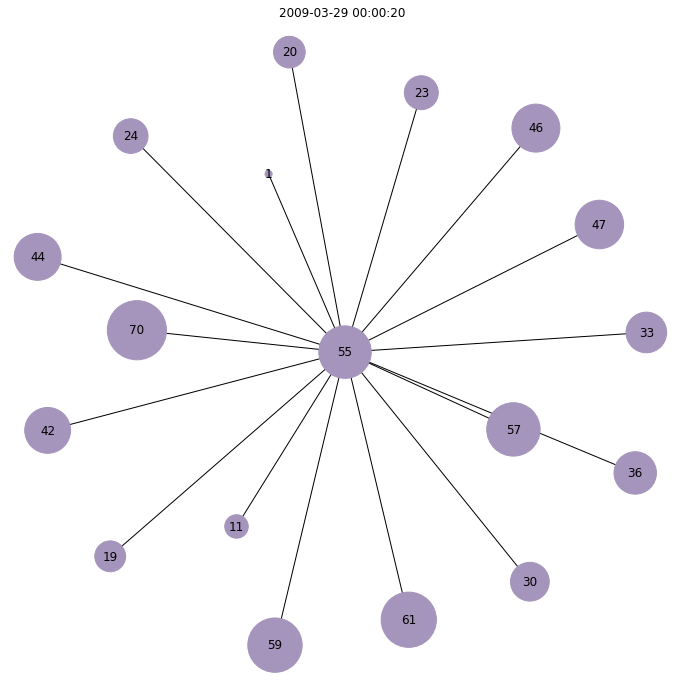

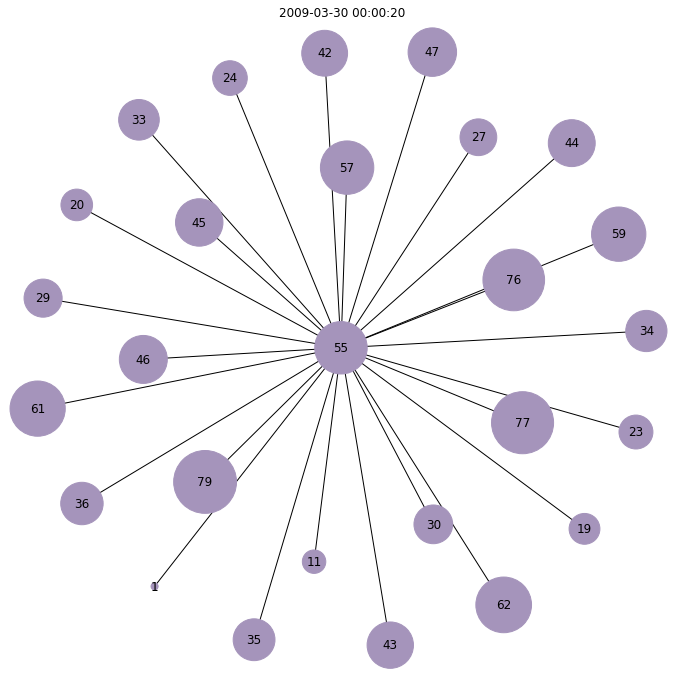

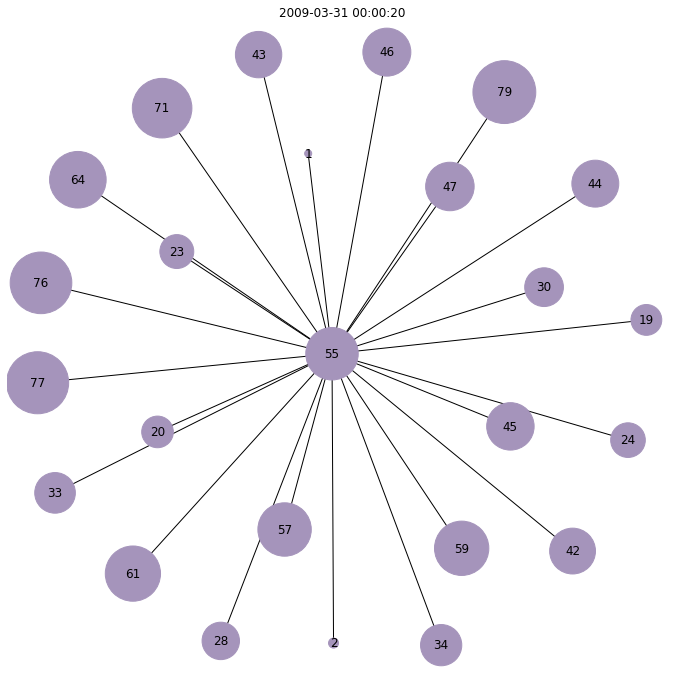

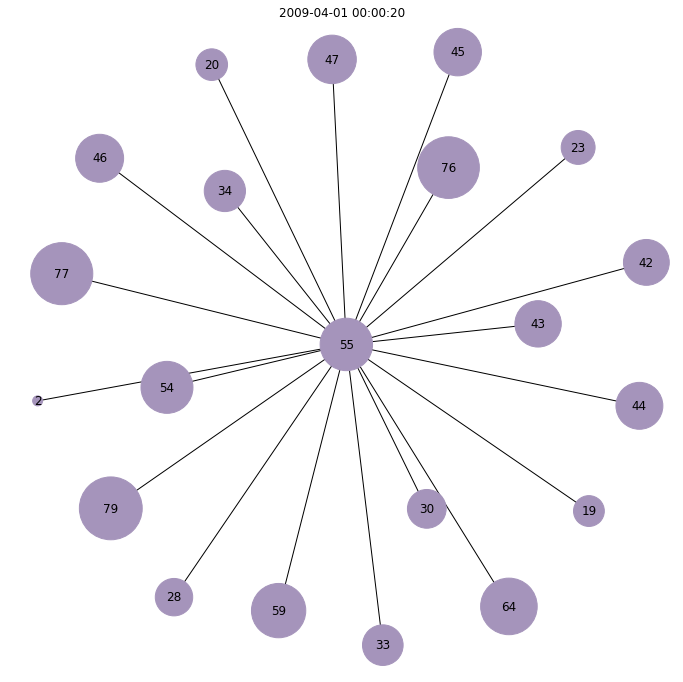

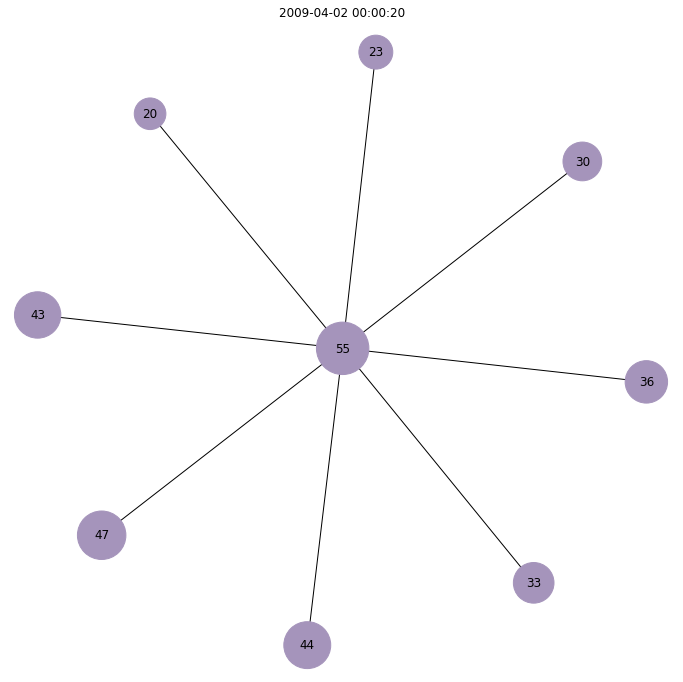

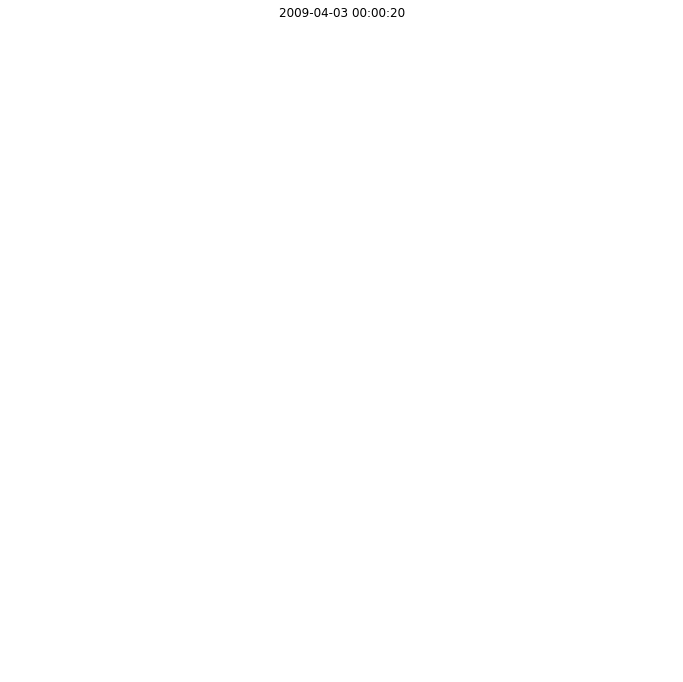

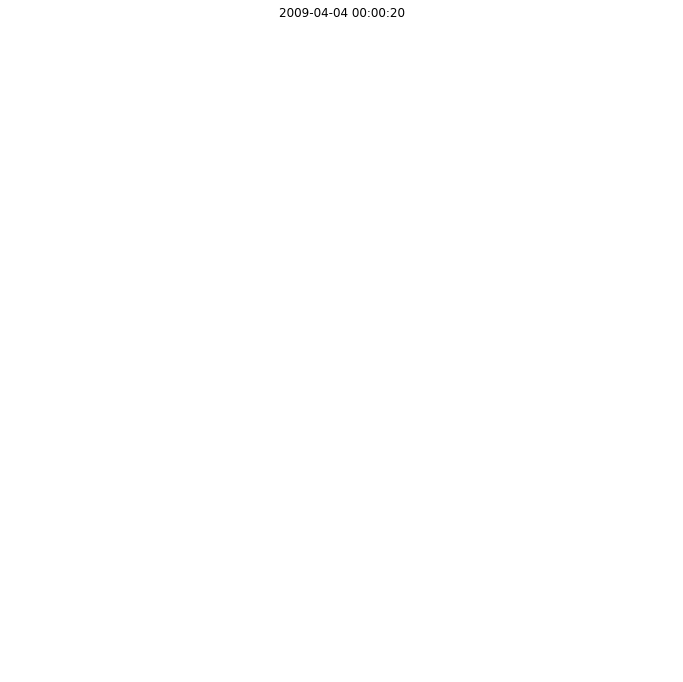

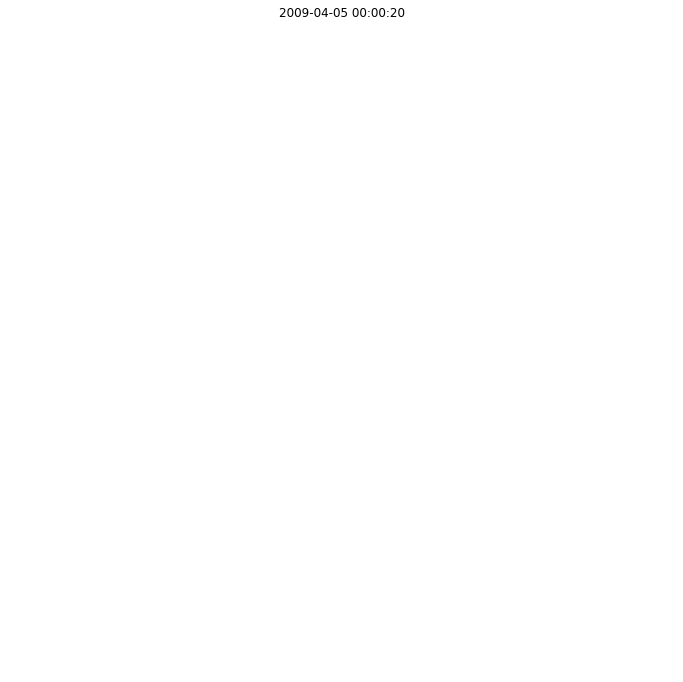

In [ ]:
for t, ig in construct_graphs(wlan_prox, id=55, freq='D', start='2009-03-08', end='2009-04-05').items():
    plt.figure(figsize=(12,12))
    plt.title(t)
    nx.draw_spring(ig, node_size=[50*c for c in nx.degree_centrality(ig)], node_color="#A594BB", with_labels=True)

## Interaction Graphs - Characteristics

In [ ]:
mgp.columns

Index(['user.id', 'genre', 'date', 'score'], dtype='object')

In [ ]:
mgp[mgp['date'] == '2008-09-15']

,user.id,genre,date,score
26,6,indie / alternative rock,2008-09-15,2 Moderate Interest
27,19,indie / alternative rock,2008-09-15,2 Moderate Interest
28,30,indie / alternative rock,2008-09-15,2 Moderate Interest
29,71,indie / alternative rock,2008-09-15,NaN
30,1,indie / alternative rock,2008-09-15,3 High Interest
...,...,...,...,...
809,43,other,2008-09-15,3 High Interest
810,34,other,2008-09-15,1 Slight Interest
811,13,other,2008-09-15,NaN
812,49,other,2008-09-15,3 High Interest


### Obsolete?

In [ ]:
health['survey.month'] == 2008.09

0       True
1       True
2       True
3       True
4       True
       ...  
380    False
381    False
382    False
383    False
384    False
Name: survey.month, Length: 385, dtype: bool

In [ ]:
wlan_prox_health = wlan_prox.merge(health[health['survey.month'] == 2008.09], how='left', left_on='user.id', right_on='user_id')

In [ ]:
wlan_prox_health.groupby(['survey.month', 'aerobic_per_week']).size()

survey.month  aerobic_per_week
2008.09       0.0                 265788
              1.0                 531859
              2.0                 532487
              3.0                 280361
              4.0                 107684
              5.0                 250662
              6.0                  74158
              7.0                  13532
dtype: int64

In [ ]:
def group_graphs_stat(df, col, *args, **kwargs):
    tmp = df.groupby([col])
    out = {}
    for k, g in tmp:
        out_k = {}
        for t, ig in construct_graphs(g, *args, **kwargs).items():
            #plt.figure(figsize=(12,12))
            #plt.title(f"{col}={k}, {t}")
            #nx.draw_spring(ig, node_size=[50*c for c in nx.degree_centrality(ig)], node_color="#A594BB", with_labels=True)
            print(f"{col}={k}, {t}")
            centrality = nx.degree_centrality(ig)
            print(centrality)
            degree_dist = sorted([d for n, d in ig.degree()], reverse=True)
            print(degree_dist)
            out_k['centrality'] = centrality
            out_k['degree_dist'] = degree_dist
        out[k] = out_k
    print(out)
    return out

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(wlan_prox_health['r_time'].unique())
    print(wlan_prox_health.groupby(pd.Grouper(key='r_time', freq='Y', offset=None, origin='start', label='right')).size())

['2007-09-05T14:02:20.000000000' '2007-09-05T14:07:20.000000000'
 '2007-09-05T14:12:40.000000000' ... '2009-07-16T18:30:20.000000000'
 '2009-07-16T18:35:20.000000000' '2009-07-16T18:40:40.000000000']
r_time
2007-12-31         23
2008-12-31     389071
2009-12-31    1842956
Freq: A-DEC, dtype: int64


In [ ]:
wlan_prox_health

,user_id_x,time_wlan,wireless_mac,strength,unix_time,r_time,user.id,remote.user.id.if.known,time_prox,prob2,user_id_y,current_weight,current_height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month
0,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,42,2007-09-05 14:02:11,0.034,58.0,170.0,73.0,3.0,1.0,Healthy,1.0,2.0,Never,2008.09
1,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,49,2007-09-05 14:02:11,0.000,58.0,170.0,73.0,3.0,1.0,Healthy,1.0,2.0,Never,2008.09
2,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,54,2007-09-05 14:02:11,NaN,58.0,170.0,73.0,3.0,1.0,Healthy,1.0,2.0,Never,2008.09
3,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,57,2007-09-05 14:02:11,0.233,58.0,170.0,73.0,3.0,1.0,Healthy,1.0,2.0,Never,2008.09
4,NaN,NaT,NaN,NaN,NaN,2007-09-05 14:02:20,58,74,2007-09-05 14:02:11,NaN,58.0,170.0,73.0,3.0,1.0,Healthy,1.0,2.0,Never,2008.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232045,NaN,NaT,NaN,NaN,NaN,2009-07-16 15:56:20,64,43,2009-07-16 15:56:25,NaN,64.0,204.0,68.0,1.0,2.0,Very unhealthy,NaN,NaN,Never,2008.09
2232046,NaN,NaT,NaN,NaN,NaN,2009-07-16 16:02:00,64,43,2009-07-16 16:01:57,NaN,64.0,204.0,68.0,1.0,2.0,Very unhealthy,NaN,NaN,Never,2008.09
2232047,NaN,NaT,NaN,NaN,NaN,2009-07-16 18:30:20,64,62,2009-07-16 18:30:11,0.000,64.0,204.0,68.0,1.0,2.0,Very unhealthy,NaN,NaN,Never,2008.09
2232048,NaN,NaT,NaN,NaN,NaN,2009-07-16 18:35:20,64,62,2009-07-16 18:35:26,0.000,64.0,204.0,68.0,1.0,2.0,Very unhealthy,NaN,NaN,Never,2008.09


### Helper functions

In [ ]:
def make_zipf(df, col='freq'):
    df = df.sort_values(col, ascending=False)
    df['rank'] = df[col].rank(method='max', ascending=False)
    df[f"log_{col}"] = np.log10(df[col])
    df["log_rank"] = np.log10(df['rank'])
    return df

In [ ]:
def fit_predict(lower, upper=None, slope=1, intercept=0):
    if lower is tuple:
        lower, upper = lower
    
    x = np.linspace(lower, upper, 100)
    y = slope * x + intercept

    return x, y

In [ ]:
def regress_zipf(df, min_rank=None, max_rank=None, alpha=0.05):
    slope, intercept, _, _, serr = ss.linregress(df[['log_rank', 'log_freq']])
    z_alpha = -slope

    lci = -slope - ss.t.ppf(1-alpha/2, df=len(df) - 2)*serr
    uci = -slope + ss.t.ppf(1-alpha/2, df=len(df) - 2)*serr
    margin = np.round(z_alpha - lci, 4)
    
    x, y = fit_predict(df['log_rank'].min(), df['log_rank'].max(), slope, intercept)
    return x, y, z_alpha, margin

### More obsolete?

aerobic_per_week=0.0, 2010-01-01 00:00:00
{5: 0.943661971830986, 1: 0.11267605633802817, 2: 0.11267605633802817, 4: 0.11267605633802817, 6: 0.11267605633802817, 8: 0.15492957746478875, 9: 0.07042253521126761, 11: 0.1267605633802817, 12: 0.11267605633802817, 14: 0.9154929577464789, 15: 0.11267605633802817, 16: 0.11267605633802817, 18: 0.1267605633802817, 19: 0.1267605633802817, 20: 0.1267605633802817, 21: 0.15492957746478875, 22: 0.9859154929577465, 23: 0.11267605633802817, 24: 0.1267605633802817, 25: 0.056338028169014086, 27: 0.1267605633802817, 28: 0.1267605633802817, 29: 0.11267605633802817, 30: 0.14084507042253522, 31: 0.08450704225352113, 32: 0.14084507042253522, 33: 0.8591549295774648, 34: 0.11267605633802817, 35: 0.08450704225352113, 36: 0.11267605633802817, 37: 0.09859154929577466, 38: 0.14084507042253522, 40: 0.1267605633802817, 42: 0.14084507042253522, 43: 0.11267605633802817, 44: 0.1267605633802817, 45: 0.056338028169014086, 46: 0.1267605633802817, 47: 0.11267605633802817, 48

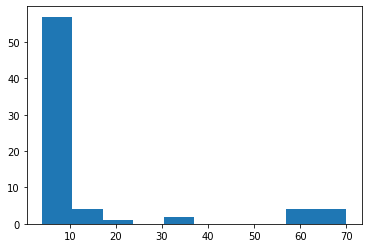

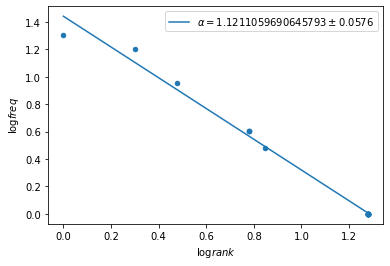

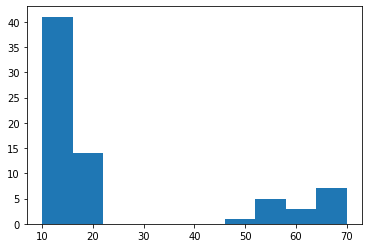

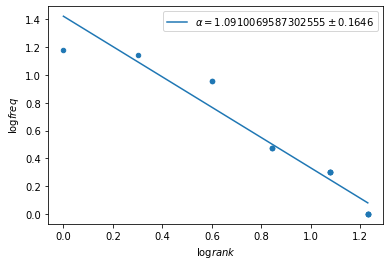

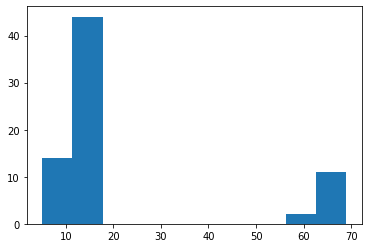

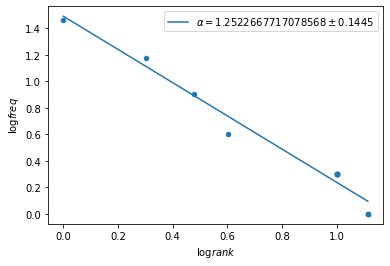

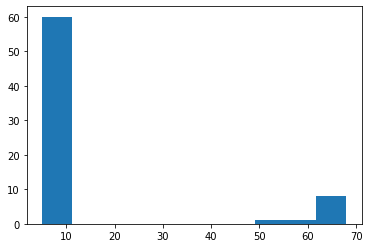

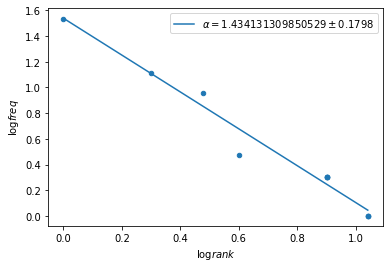

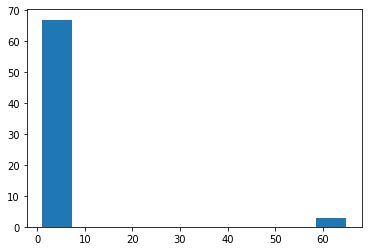

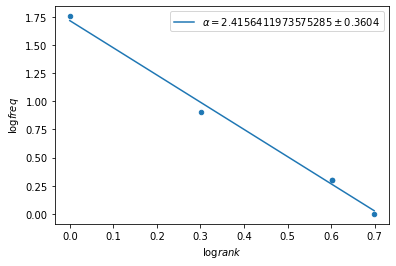

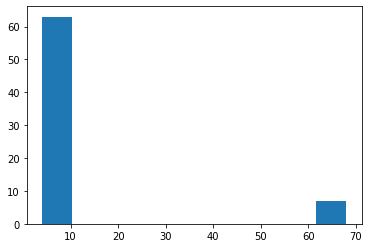

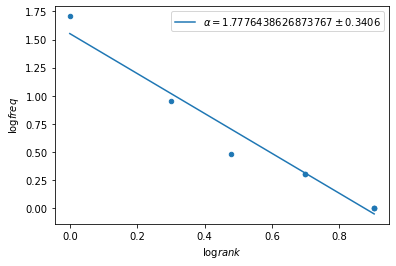

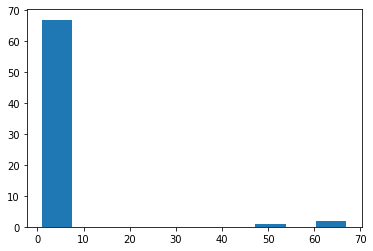

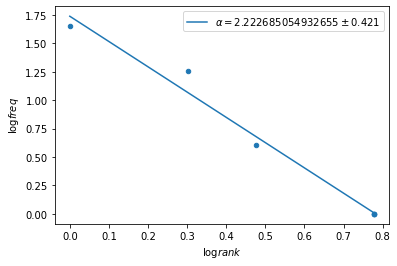

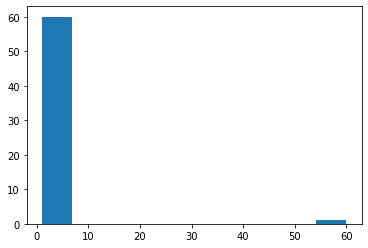

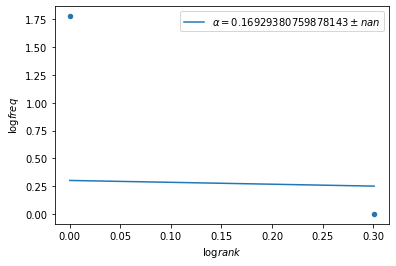

In [ ]:
tmp = group_graphs_stat(wlan_prox_health, 'aerobic_per_week', freq='2YS', start='2008-08-01')
for k, d in tmp.items():
    plt.figure()
    plt.hist(d['degree_dist'])
    unique, count = np.unique(d['degree_dist'], return_counts=True)

    df = make_zipf(pd.DataFrame({'size': unique, 'freq': count}))
    x, y, alpha, alpha_margin = regress_zipf(df)

    df.plot('log_rank', 'log_freq', kind='scatter')
    plt.plot(x, y, label=fr"$\alpha={alpha}\pm {alpha_margin}$")
    plt.xlabel(r'$\log{rank}$')
    plt.ylabel(r'$\log{freq}$')
    plt.legend()

    plt.savefig(f"{k}_aerobic_degree_dist_zipf.png")

sports_per_week=0.0, 2010-01-01 00:00:00
{7: 0.7777777777777777, 1: 0.3611111111111111, 2: 0.4305555555555555, 4: 0.4305555555555555, 5: 0.4305555555555555, 8: 0.9722222222222222, 11: 0.9027777777777777, 14: 0.9444444444444444, 15: 0.4583333333333333, 16: 0.8472222222222222, 18: 0.4583333333333333, 20: 0.9583333333333333, 21: 0.986111111111111, 23: 0.41666666666666663, 24: 0.875, 27: 0.9583333333333333, 28: 0.9444444444444444, 29: 0.9722222222222222, 30: 0.4583333333333333, 31: 0.9166666666666666, 32: 0.9583333333333333, 33: 0.8472222222222222, 34: 0.4305555555555555, 36: 0.4444444444444444, 40: 0.4444444444444444, 42: 0.9722222222222222, 43: 0.9583333333333333, 44: 0.9722222222222222, 46: 0.4583333333333333, 47: 0.9722222222222222, 49: 0.4583333333333333, 52: 0.4305555555555555, 54: 0.9444444444444444, 56: 0.875, 57: 0.4444444444444444, 58: 0.40277777777777773, 59: 0.4444444444444444, 60: 0.4583333333333333, 61: 0.3611111111111111, 62: 0.4583333333333333, 63: 0.4444444444444444, 64: 0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

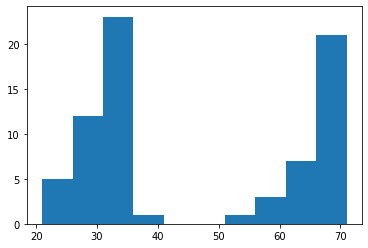

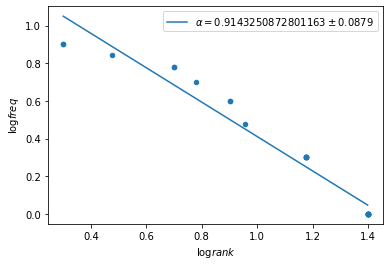

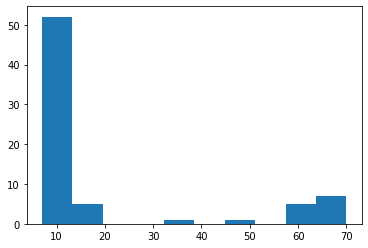

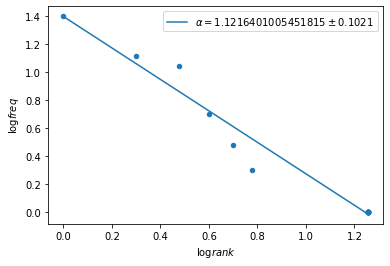

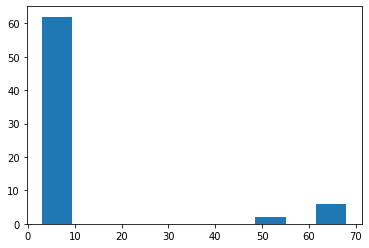

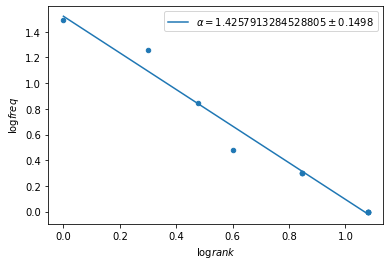

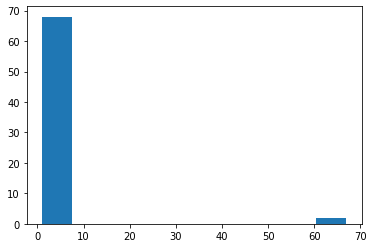

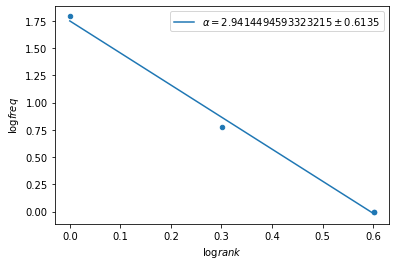

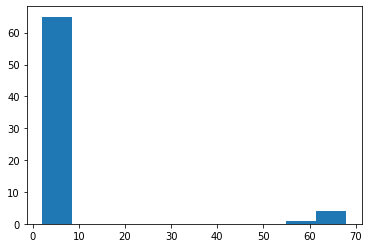

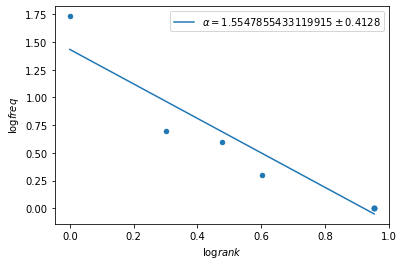

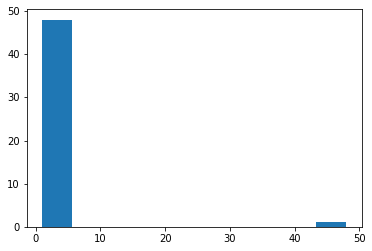

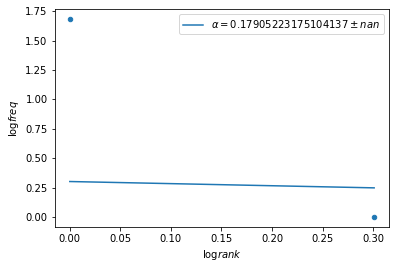

In [ ]:
tmp = group_graphs_stat(wlan_prox_health, 'sports_per_week', freq='2YS', start='2008-08-01')
for k, d in tmp.items():
    plt.figure()
    plt.hist(d['degree_dist'])
    unique, count = np.unique(d['degree_dist'], return_counts=True)

    df = make_zipf(pd.DataFrame({'size': unique, 'freq': count}))
    x, y, alpha, alpha_margin = regress_zipf(df)

    df.plot('log_rank', 'log_freq', kind='scatter')
    plt.plot(x, y, label=fr"$\alpha={alpha}\pm {alpha_margin}$")
    plt.xlabel(r'$\log{rank}$')
    plt.ylabel(r'$\log{freq}$')
    plt.legend()

    plt.savefig(f"{k}_sports_degree_dist_zipf.eps")

### Health similarity

In [ ]:
# Identify the changes in the node centrality and degree distribution
# Clustering coefficient

In [ ]:
tmp_health = health[health['survey.month'] == 2008.09]
mod_health = tmp_health.drop('survey.month', axis=1)
mod_health['current_smoking'] = mod_health['current_smoking'].where(mod_health['current_smoking'] == 'Never', 'Yes')
mod_health = mod_health.set_index('user_id')
mod_health['aerobic_per_week'] = mod_health['aerobic_per_week'].replace(np.nan, 0)
mod_health['sports_per_week'] = mod_health['sports_per_week'].replace(np.nan, 0)
mod_health['current_weight'] = pd.cut(mod_health['current_weight'].replace(0, np.nan), np.arange(round(mod_health['current_weight'].min(), -1), round(mod_health['current_weight'].max(), -1)+1, 10))
mod_health['current_height'] = mod_health['current_height'].where(lambda x: x < 100, np.nan)
mod_health['current_height'] = pd.cut(mod_health['current_height'].replace(0, np.nan), np.arange(round(mod_health['current_height'].min(), -1), round(mod_health['current_height'].max(), -1)+1, 4))
mod_health = pd.get_dummies(mod_health, columns=['current_weight', 'current_height', 'current_smoking', 'healthy_diet'])
mod_health

,salads_per_week,veggies_fruits_per_day,aerobic_per_week,sports_per_week,"current_weight_(0.0, 10.0]","current_weight_(10.0, 20.0]","current_weight_(20.0, 30.0]","current_weight_(30.0, 40.0]","current_weight_(40.0, 50.0]","current_weight_(50.0, 60.0]","current_weight_(60.0, 70.0]","current_weight_(70.0, 80.0]","current_weight_(80.0, 90.0]","current_weight_(90.0, 100.0]","current_weight_(100.0, 110.0]","current_weight_(110.0, 120.0]","current_weight_(120.0, 130.0]","current_weight_(130.0, 140.0]","current_weight_(140.0, 150.0]","current_weight_(150.0, 160.0]","current_weight_(160.0, 170.0]","current_weight_(170.0, 180.0]","current_weight_(180.0, 190.0]","current_weight_(190.0, 200.0]","current_weight_(200.0, 210.0]","current_weight_(210.0, 220.0]","current_weight_(220.0, 230.0]","current_weight_(230.0, 240.0]","current_weight_(240.0, 250.0]","current_weight_(250.0, 260.0]","current_weight_(260.0, 270.0]","current_weight_(270.0, 280.0]","current_weight_(280.0, 290.0]","current_weight_(290.0, 300.0]","current_height_(60.0, 64.0]","current_height_(64.0, 68.0]","current_height_(68.0, 72.0]","current_height_(72.0, 76.0]","current_height_(76.0, 80.0]",current_smoking_Never,current_smoking_Yes,healthy_diet_Average,healthy_diet_Below average,healthy_diet_Healthy,healthy_diet_Unhealthy,healthy_diet_Very healthy,healthy_diet_Very unhealthy
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55,0.0,0.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
36,2.0,1.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
39,0.0,2.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
37,2.0,5.0,5.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
72,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,5.0,3.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
34,1.0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
13,1.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Might be useful: !git clone https://github.com/taki0112/Vector_Similarity.git

In [ ]:
# Investigate similarity and number of interactions
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity

In [ ]:
dist = euclidean_distances(mod_health)

In [ ]:
# get index of user id in the dist matrix
def get_loc(x):
    try:
        return mod_health.index.get_loc(x)
    except:
        return -1

In [ ]:
dist_idx = wlan_prox[['user.id', 'remote.user.id.if.known']].applymap(lambda x: get_loc(x)).to_numpy().astype(int)
dist_idx

array([[53, 58],
       [53, 67],
       [53, 47],
       ...,
       [23, 54],
       [23, 54],
       [23, 54]])

In [ ]:
# set those that that had index of -1 to np.nan since dist for them are actually unknown
wlan_prox_dist = dist[dist_idx[:, 0], dist_idx[:, 1]]
wlan_prox_dist[np.any(dist_idx == -1, axis=1)] = np.nan

In [ ]:
wlan_prox['dist'] = wlan_prox_dist

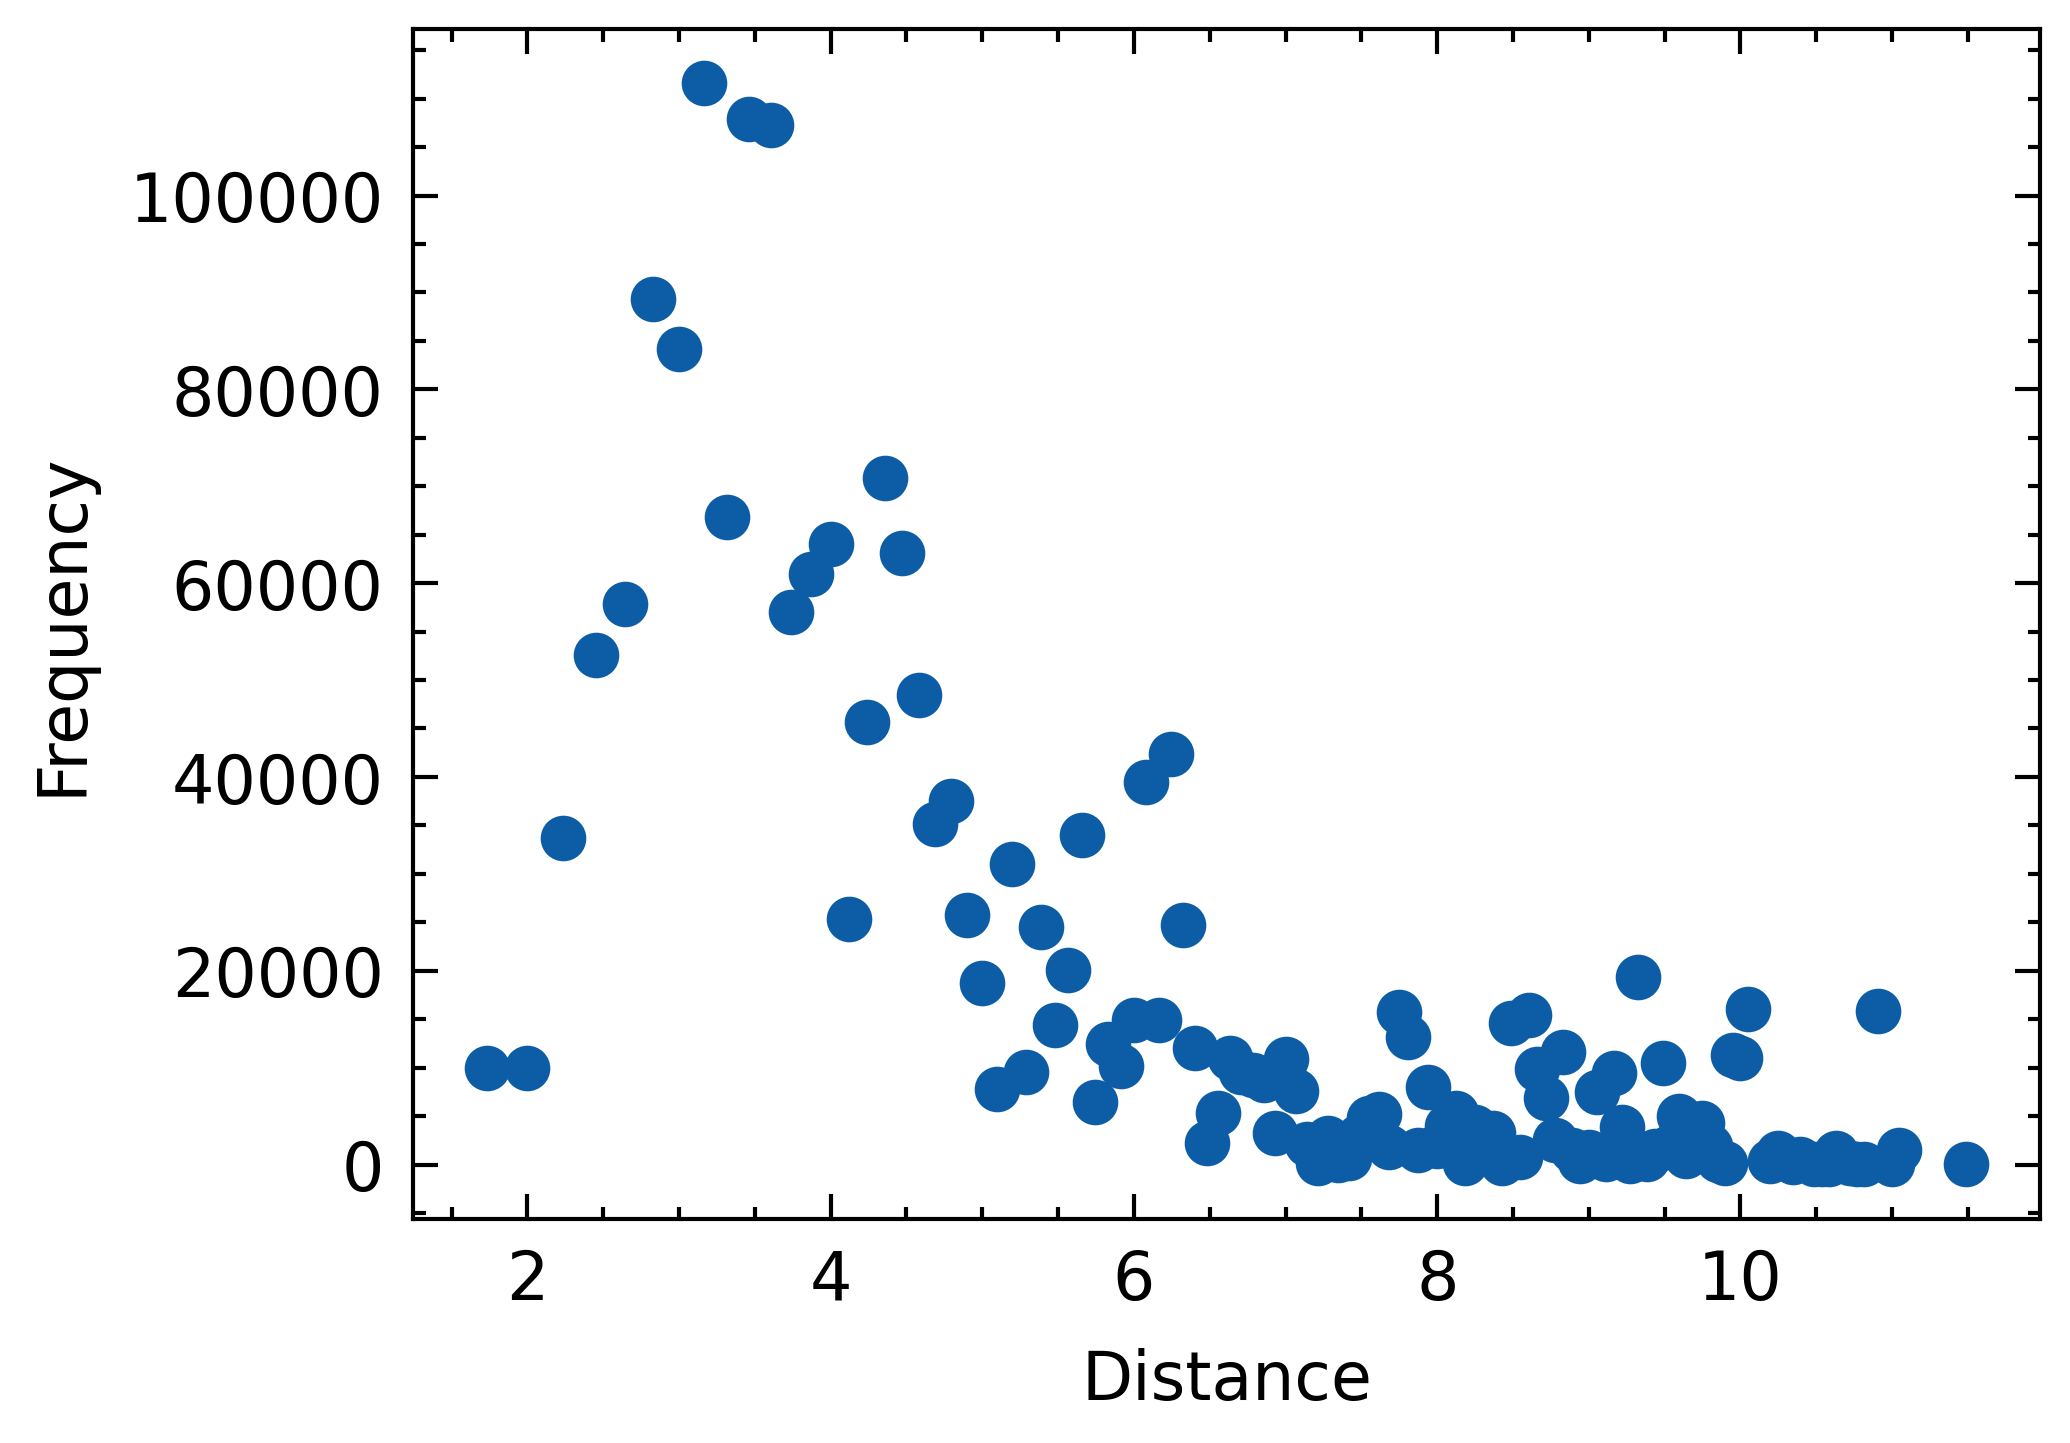

In [ ]:
df_simcount = wlan_prox.groupby(['dist'], as_index=False).size()
df_simcount.plot('dist', 'size', kind='scatter')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.savefig('colocation-freq-dist.eps')

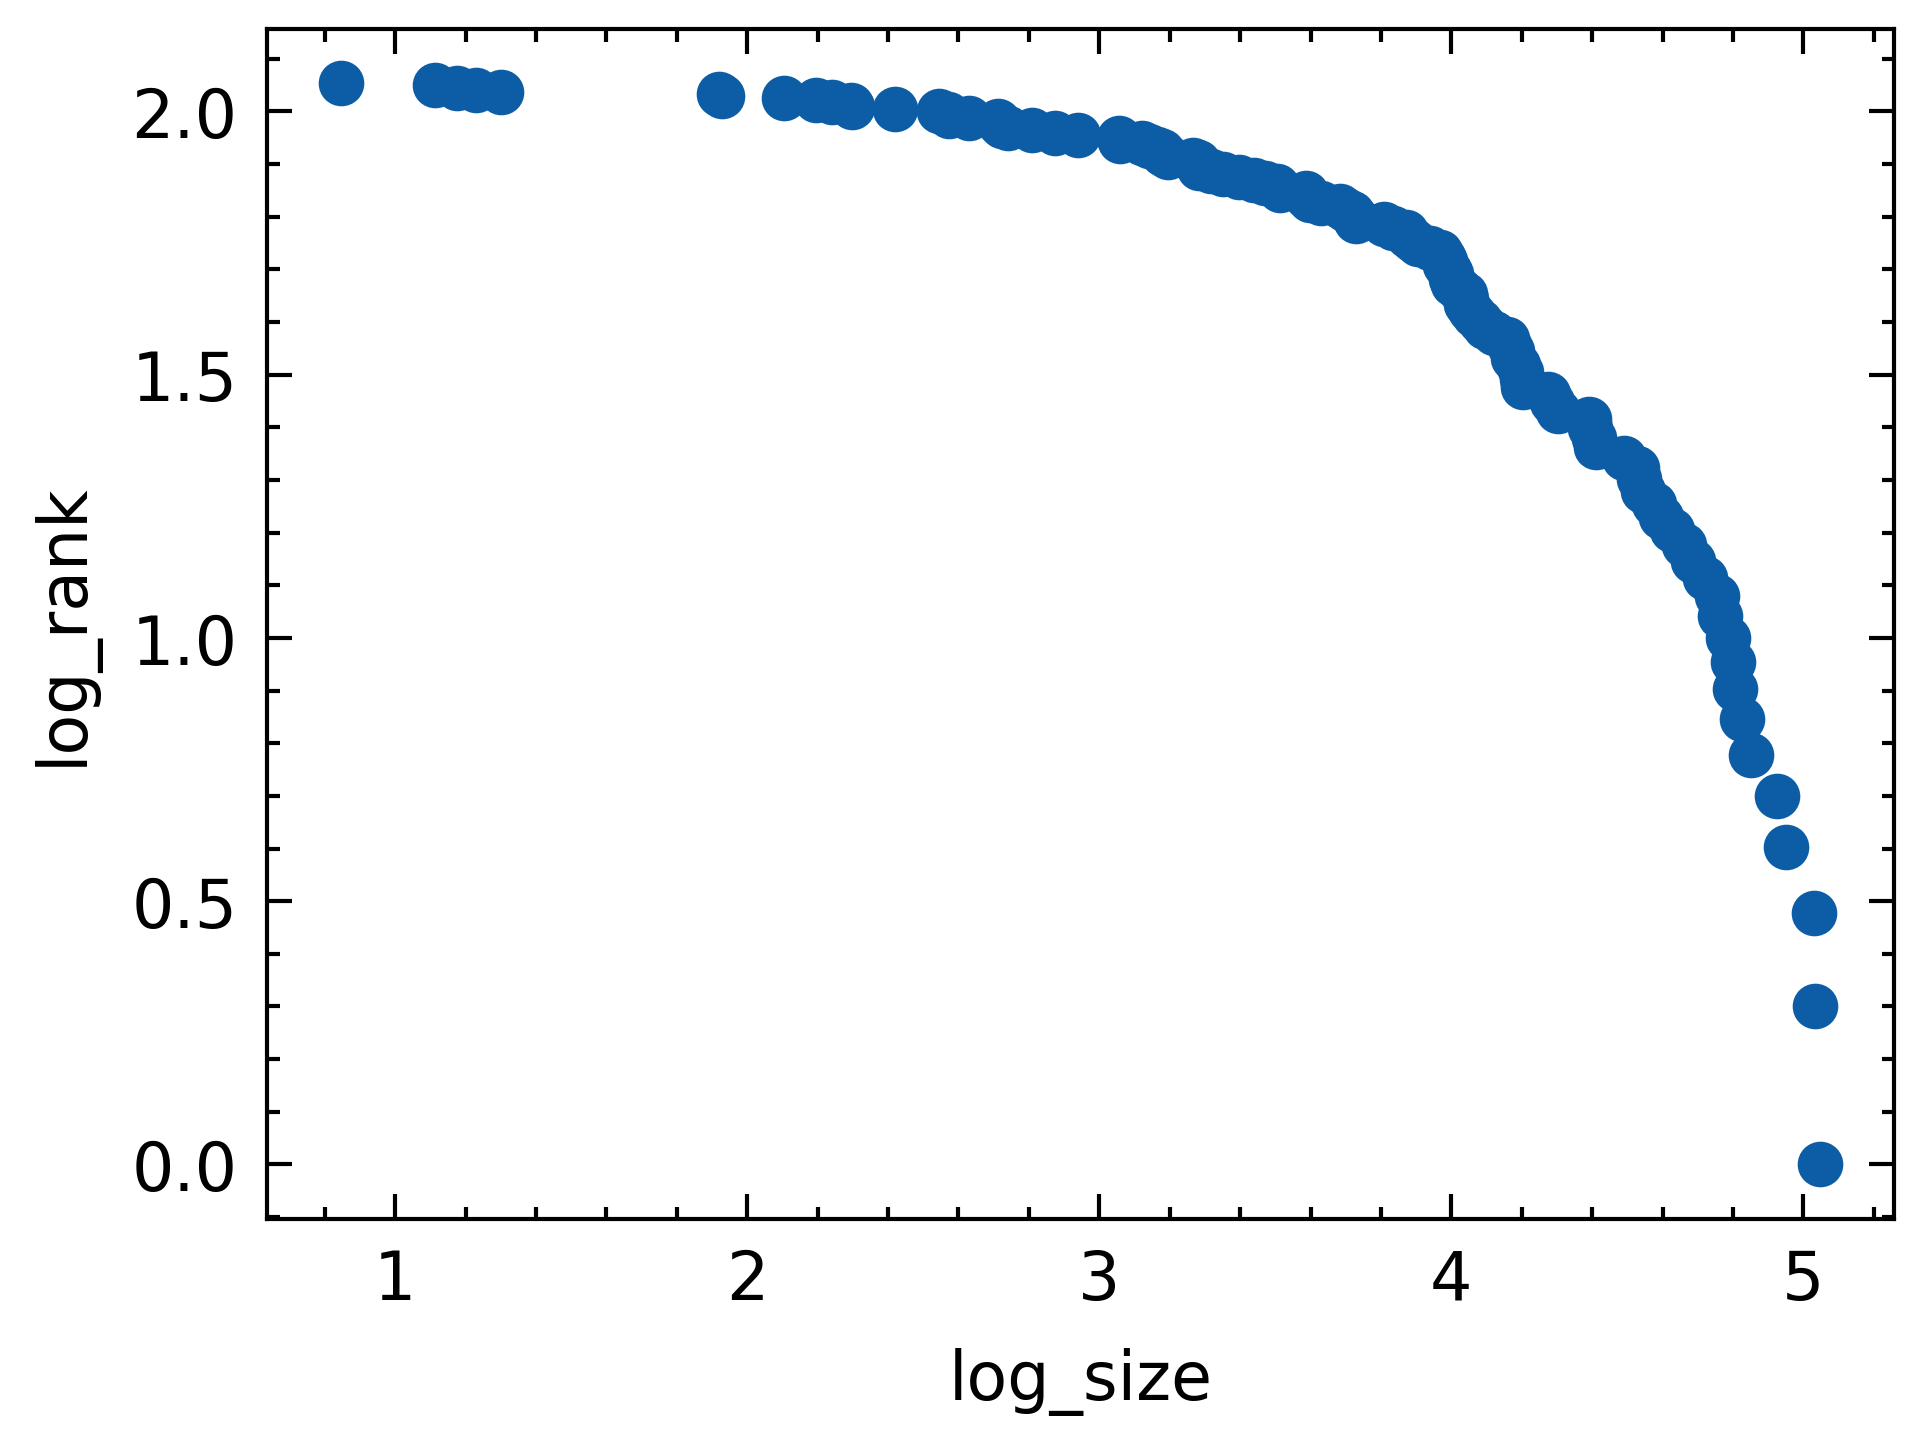

In [ ]:
df_simcount_zipf = make_zipf(df_simcount, col='size')
df_simcount_zipf.plot('log_size', 'log_rank', kind='scatter')

In [ ]:
y, x = np.histogram(wlan_prox['dist'].dropna(), bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2
a, b, loc, scale = ss.beta.fit(wlan_prox['dist'].dropna())
pdf_fit = ss.beta.pdf(x, a, b, loc=loc, scale=scale)
np.sum(np.power(y - pdf_fit, 2))

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


7.901151284798346

In [ ]:
start = ss.beta.ppf(0.01, a, b, loc=loc, scale=scale)
end = ss.beta.ppf(0.99, a, b, loc=loc, scale=scale)
pdf = pd.Series(pdf_fit, np.linspace(start, end, 200))
pdf

1.982694     0.015994
2.030458     0.026266
2.078222     0.037205
2.125986     0.048483
2.173750     0.059884
               ...   
11.296639    0.007119
11.344403    0.006913
11.392166    0.006712
11.439930    0.006517
11.487694    0.006327
Length: 200, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


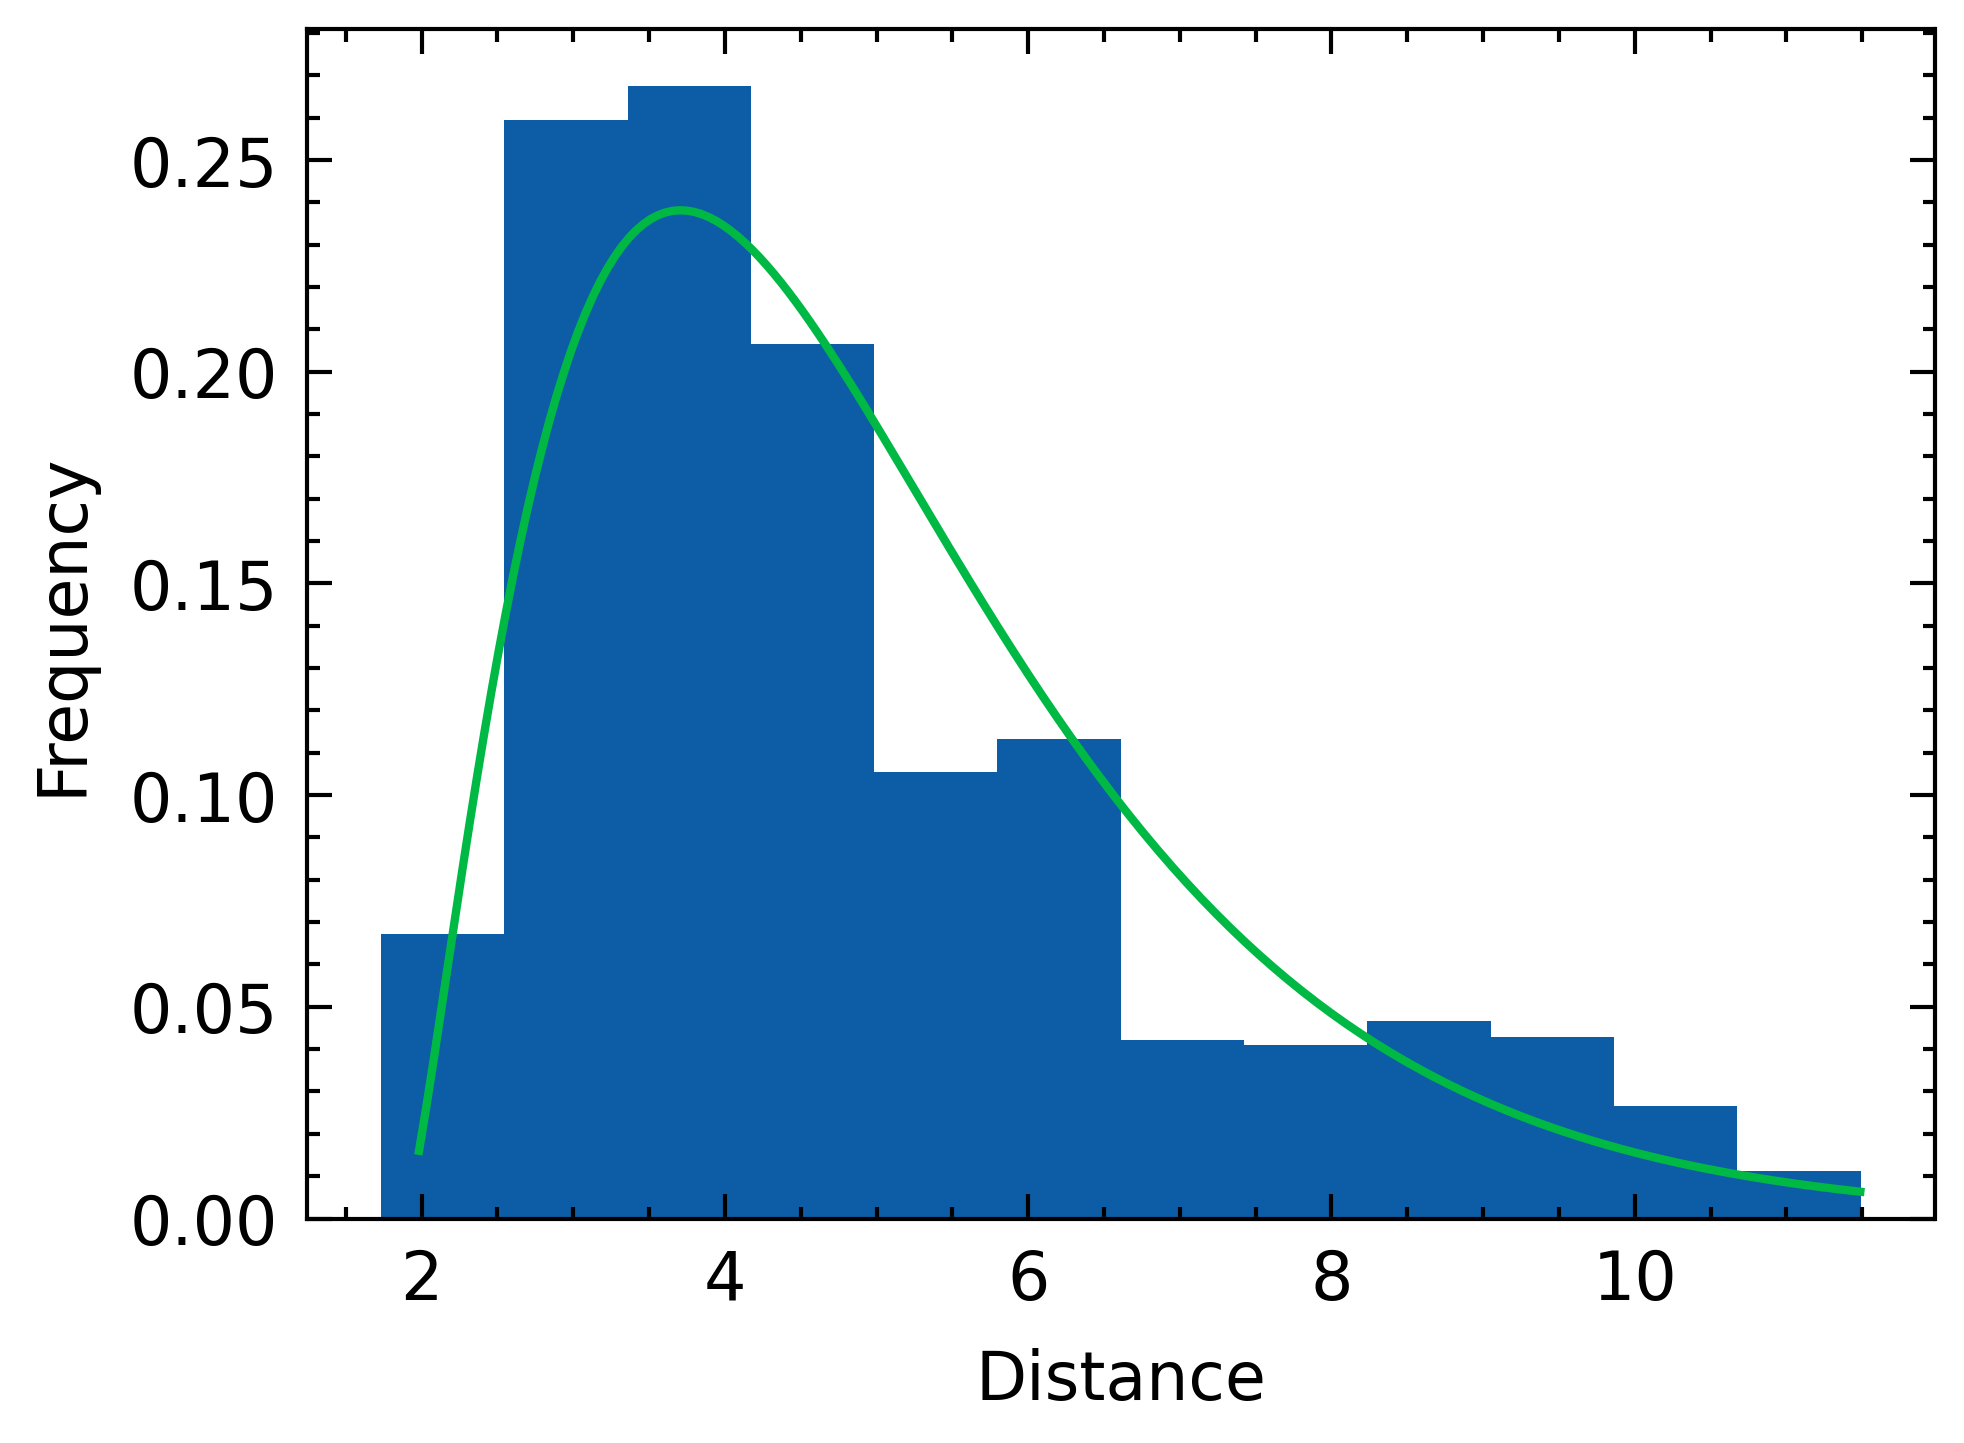

In [ ]:
plt.hist(wlan_prox_dist, bins=12, density=True)
pdf.plot()

plt.ylabel('Frequency')
plt.xlabel('Distance')
plt.savefig('dist-freq.eps')

In [ ]:
# TODO: user.id detects itself?
wlan_prox.groupby(['user.id', 'remote.user.id.if.known', 'dist']).size()

user.id  remote.user.id.if.known  dist     
1        2                        4.358899      9036
         4                        6.244998       651
         5                        8.660254        21
         6                        4.358899         8
         7                        6.480741       176
                                               ...  
72       67                       4.582576       462
         68                       10.908712    10624
         69                       3.464102      8576
         70                       6.855655       166
         71                       4.000000       319
Length: 3508, dtype: int64

In [ ]:
dist_tti = []
for (_, _, tmp_dist), g in wlan_prox.groupby(['user.id', 'remote.user.id.if.known', 'dist']):
    dist_tti.extend(pd.DataFrame({'dist': tmp_dist, 'delta': g['time_prox'].diff().replace(pd.Timedelta(0), np.nan).dropna()}).to_numpy())
dist_tti = pd.DataFrame(dist_tti, columns=['dist', 'time_delta'])
dist_tti['time_delta'] = dist_tti['time_delta'].astype('timedelta64[m]')
dist_tti

,dist,time_delta
0,4.358899,20.0
1,4.358899,10.0
2,4.358899,15.0
3,4.358899,10.0
4,4.358899,1444.0
...,...,...
1734204,4.000000,5092.0
1734205,4.000000,4199.0
1734206,4.000000,247.0
1734207,4.000000,1487.0


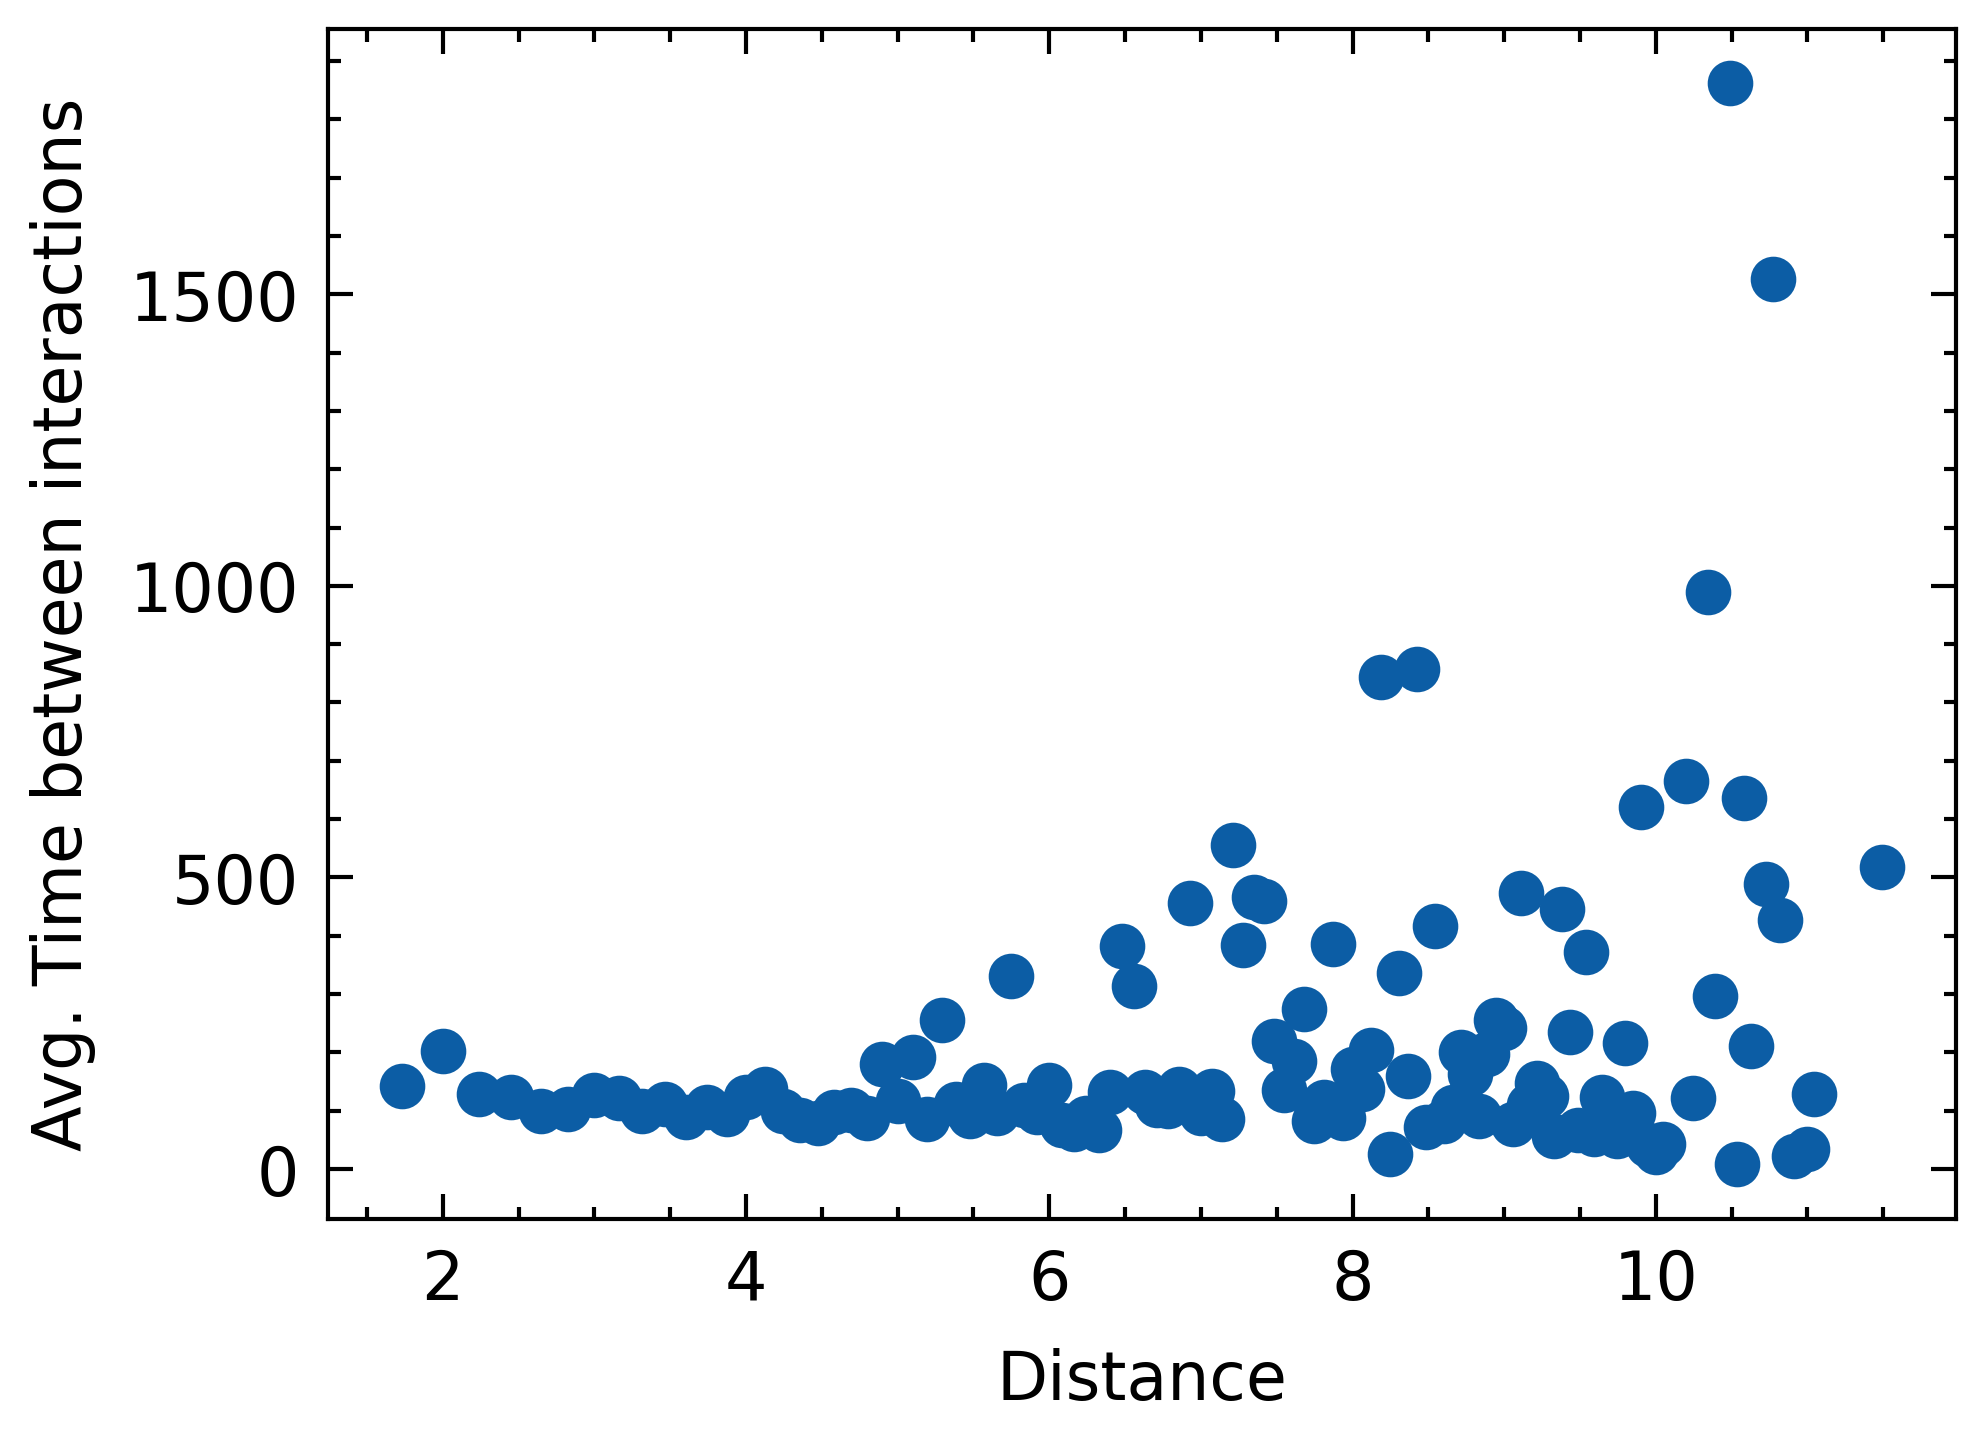

In [ ]:
dist_tti_tmp = dist_tti[dist_tti['time_delta'] < 14400]
dist_tti_tmp.groupby('dist', as_index=False).mean().plot('dist', 'time_delta', kind='scatter')

plt.xlabel('Distance')
plt.ylabel('Avg. Time between interactions')
plt.savefig('avg_tti.eps')